# Notebook for analyzing KcsA Deactivated state
MD trajactory: [kcsa_5000ns_1218](../kcsa_5000ns_1218)  4000ns using PDB 1K4C, E71 protonated, protein sequence S22 to H124 
MD parameters: OLPS4, POPC lipid with endogenous ligand POPG, 12 K+ (8 add in add ions ,4 with structture), 100 ns (sampling 100 ps, 40001frames)   
Step 1. calculate torsion angle  python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/centered-out.cms   1:103  A   kcsa_Deactivated1us_A_torsion.csv 
EX: 


In [2]:
chains = ['A', 'B', 'C', 'D']

for i, chain in zip(range(4),chains):
    print(f'python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_deactivated_5us_centered-out.cms   {1+i*103}:{103+i*103} {chain}  kcsa_Deactivated5us_{chain}_torsion.csv ')


python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_deactivated_5us_centered-out.cms   1:103 A  kcsa_Deactivated5us_A_torsion.csv 
python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_deactivated_5us_centered-out.cms   104:206 B  kcsa_Deactivated5us_B_torsion.csv 
python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_deactivated_5us_centered-out.cms   207:309 C  kcsa_Deactivated5us_C_torsion.csv 
python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_deactivated_5us_centered-out.cms   310:412 D  kcsa_Deactivated5us_D_torsion.csv 


In [3]:
#step2. processing torsion angle
import sys
import os
sys.path.append(os.path.expanduser("~/Dropbox/KcsA/scripts"))
from script_module import *

from torsion_analysis_module import TorsionAnalyzer2

/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/data/filenames.py:110: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename


In [4]:
KcsA_analyzer = []

res_adjust_dict={'A':21, 'B':-82 , 'C':-185, 'D':-288}
# load data
for chain in ['A', 'B', 'C', 'D']:
    data_path = f'/Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_Deactivated5us_{chain}_torsion.csv'
    if os.path.exists(data_path):
        print(f"File {data_path} exists.")
        # Load the data
        KcsA_analyzer.append(TorsionAnalyzer2(data_path, adjusted_residue_index=True, res_adjust_dic=res_adjust_dict))
    else:
        print(f"File {data_path} does not exist.")

File /Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_Deactivated5us_A_torsion.csv exists.
File /Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_Deactivated5us_B_torsion.csv exists.
File /Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_Deactivated5us_C_torsion.csv exists.
File /Users/yunyao_1/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_Deactivated5us_D_torsion.csv exists.


In [5]:
intra_correlation = KcsA_analyzer[1].calculate_intra_residue_correlation()
print("Intra-residue Correlations (φ(i) vs ψ(i)):")
for residue, correlation in intra_correlation.items():
    print(f"Residue {residue}: {correlation:.3f}")

Intra-residue Correlations (φ(i) vs ψ(i)):
Residue B:22: nan
Residue B:23: -0.008
Residue B:24: -0.634
Residue B:25: -0.399
Residue B:26: -0.402
Residue B:27: -0.434
Residue B:28: -0.439
Residue B:29: -0.462
Residue B:30: -0.532
Residue B:31: -0.422
Residue B:32: -0.403
Residue B:33: -0.404
Residue B:34: -0.503
Residue B:35: -0.435
Residue B:36: -0.375
Residue B:37: -0.511
Residue B:38: -0.453
Residue B:39: -0.618
Residue B:40: -0.335
Residue B:41: -0.271
Residue B:42: -0.394
Residue B:43: -0.551
Residue B:44: -0.329
Residue B:45: -0.160
Residue B:46: -0.466
Residue B:47: -0.436
Residue B:48: -0.360
Residue B:49: -0.395
Residue B:50: -0.513
Residue B:51: -0.460
Residue B:52: 0.270
Residue B:53: 0.545
Residue B:54: 0.148
Residue B:55: 0.096
Residue B:56: -0.106
Residue B:57: -0.347
Residue B:58: -0.431
Residue B:59: -0.516
Residue B:60: -0.500
Residue B:61: 0.054
Residue B:62: -0.476
Residue B:63: -0.626
Residue B:64: -0.413
Residue B:65: -0.435
Residue B:66: -0.446
Residue B:67: -0.430

In [6]:
KcsA_analyzer[1].data

frame_index      time_ps  B:22-phi   B:22-psi   B:23-phi   B:23-psi  \
0                0  1000020.000       NaN -31.964903  45.966418  51.968044   
1                1  1000120.002       NaN -33.154984  74.423052  22.974870   
2                2  1000220.004       NaN -40.885056  65.187063  48.741166   
3                3  1000320.006       NaN -18.330711  52.282321  68.592897   
4                4  1000420.008       NaN -22.585190  62.994435  19.594200   
...            ...          ...       ...        ...        ...        ...   
39996        39996  4999699.992       NaN -15.280558  63.636797  18.734699   
39997        39997  4999799.994       NaN -42.037143  72.849379  28.994756   
39998        39998  4999899.996       NaN  -3.266468  75.950412  21.848450   
39999        39999  4999999.998       NaN   7.007498  59.838126  22.038111   
40000        40000  5000000.004       NaN   9.704370  60.755465  21.893545   

        B:24-phi   B:24-psi   B:25-phi   B:25-psi  ...  B:120-phi  B:120-psi  \
0     -60.465625 -55.142223 -53.852075 -31.814462  ... -91.908998  -0.304061   
1     -37.636318 -54.887649 -63.122533 -20.576257  ... -65.130576 -23.094131   
2     -66.979506 -39.693647 -54.759538 -36.933346  ... -70.819239 -17.326540   
3     -63.663627 -39.455193 -46.811545 -41.609359  ... -69.972669 -21.565559   
4     -35.334999 -53.539228 -79.603357 -37.233979  ... -54.061455 -36.540699   
...          ...        ...        ...        ...  ...        ...        ...   
39996 -37.164096 -50.366653 -54.646868 -33.131477  ... -74.746518 -11.335395   
39997 -47.866472 -42.260128 -65.692281 -36.526036  ... -70.719995 -21.907012   
39998 -48.755146 -44.779067 -46.809269 -50.060683  ... -80.033204 -18.753452   
39999 -46.273966 -42.673923 -54.928869 -38.221371  ... -91.848922 -16.487472   
40000 -46.931854 -42.870430 -53.276893 -42.157201  ... -90.634290 -11.987187   

       B:121-phi   B:121-psi  B:122-phi  B:122-psi   B:123-phi   B:123-psi  \
0     -92.487012  162.349212 -87.957677  72.105673   73.155011  166.286664   
1     -85.578242  160.494531 -90.392765  89.847645   68.181403  165.225206   
2     -93.975264  157.536024 -79.918714  90.481557   81.959175  151.598872   
3     -90.150262  165.820822 -88.371104  73.292042   70.385058  172.645963   
4     -66.503791  162.761230 -90.330657  82.443973   88.356942  153.521958   
...          ...         ...        ...        ...         ...         ...   
39996 -96.290308  157.484279 -78.345466  68.296410  110.073485  155.024322   
39997 -98.603147  147.600537 -72.397354  57.213303  111.977471  118.005337   
39998 -84.786417  136.033294 -72.632585  76.245402  112.428856  124.095399   
39999 -85.129487  148.054421 -74.724206  82.793686  103.800579  139.179641   
40000 -90.554093  150.799177 -73.964984  80.848909  102.832320  137.669618   

        B:124-phi  B:124-psi  
0      -97.738705        NaN  
1      -95.524874        NaN  
2     -106.165600        NaN  
3     -113.973266        NaN  
4      -99.303404        NaN  
...           ...        ...  
39996 -100.998561        NaN  
39997  -68.492298        NaN  
39998  -69.134560        NaN  
39999  -79.871839        NaN  
40000  -74.726663        NaN  

[40001 rows x 208 columns]

In [7]:
#calculate inter-residue correlation
inter_correlation = KcsA_analyzer[0].calculate_inter_residue_correlation()
print("Inter-residue Correlations (φ(i+1) vs ψ(i)):")
for residue, correlation in inter_correlation.items():
    print(f"Residue {residue}: {correlation:.3f}")

Inter-residue Correlations (φ(i+1) vs ψ(i)):
Residue A:22: 0.095
Residue A:23: 0.094
Residue A:24: -0.298
Residue A:25: -0.592
Residue A:26: -0.505
Residue A:27: -0.538
Residue A:28: -0.516
Residue A:29: -0.467
Residue A:30: -0.590
Residue A:31: -0.536
Residue A:32: -0.501
Residue A:33: -0.433
Residue A:34: -0.496
Residue A:35: -0.516
Residue A:36: -0.355
Residue A:37: -0.486
Residue A:38: -0.448
Residue A:39: -0.518
Residue A:40: -0.584
Residue A:41: -0.591
Residue A:42: -0.451
Residue A:43: -0.540
Residue A:44: -0.648
Residue A:45: -0.519
Residue A:46: -0.537
Residue A:47: -0.431
Residue A:48: -0.379
Residue A:49: -0.760
Residue A:50: -0.402
Residue A:51: -0.472
Residue A:52: 0.932
Residue A:53: -0.411
Residue A:54: -0.227
Residue A:55: 0.860
Residue A:56: -0.226
Residue A:57: -0.386
Residue A:58: -0.074
Residue A:59: -0.721
Residue A:60: -0.463
Residue A:61: -0.377
Residue A:62: -0.308
Residue A:63: -0.491
Residue A:64: -0.571
Residue A:65: -0.528
Residue A:66: -0.552
Residue A:67: 

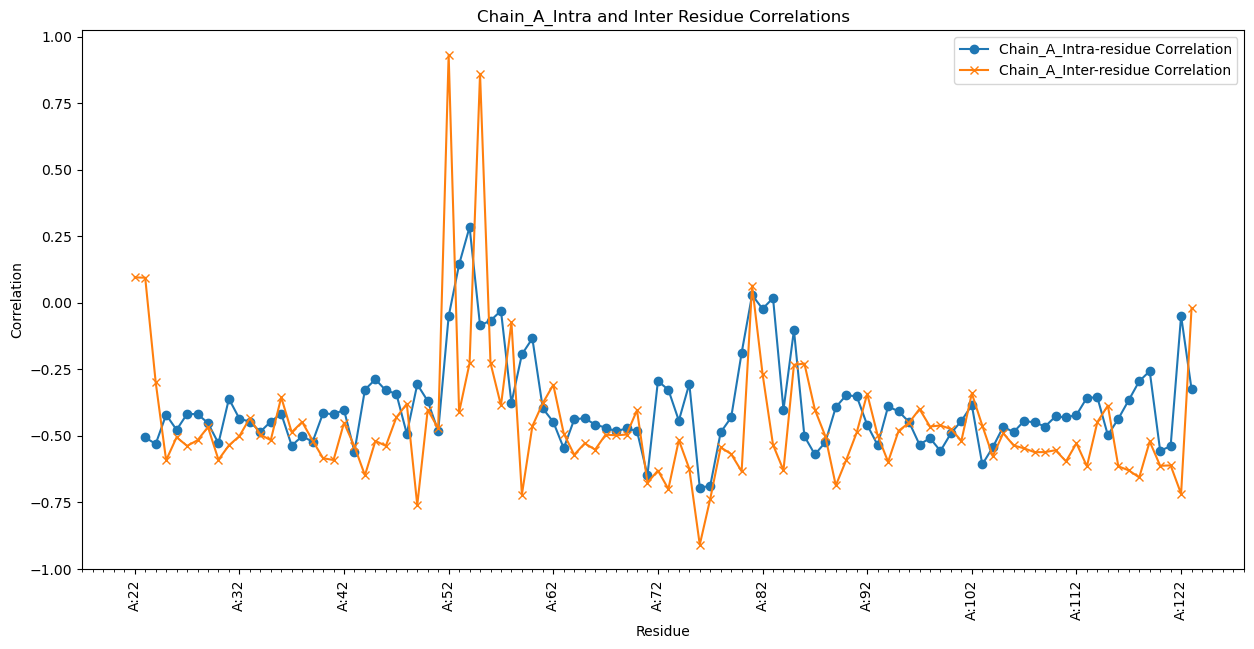

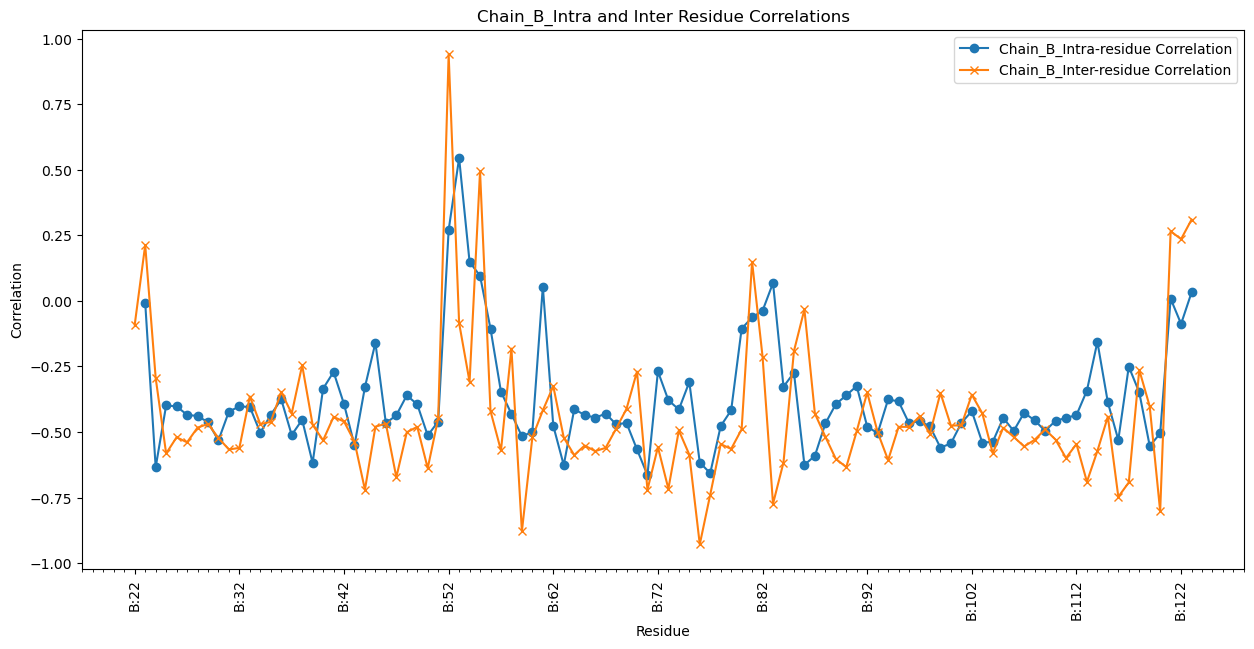

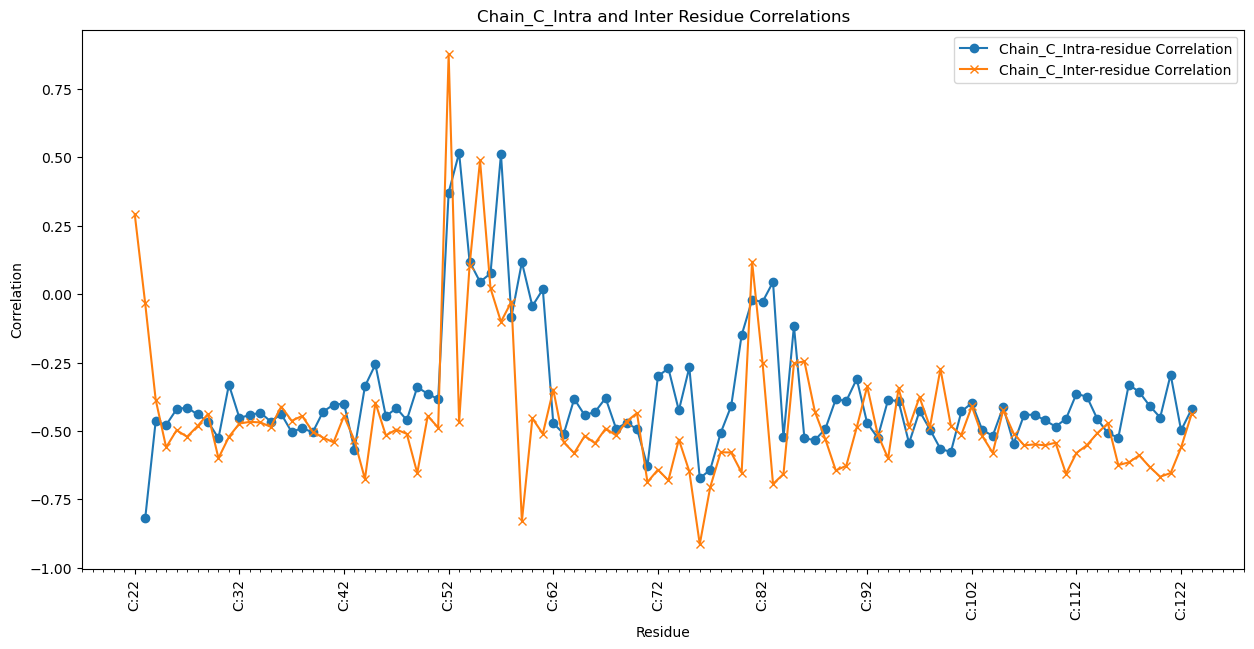

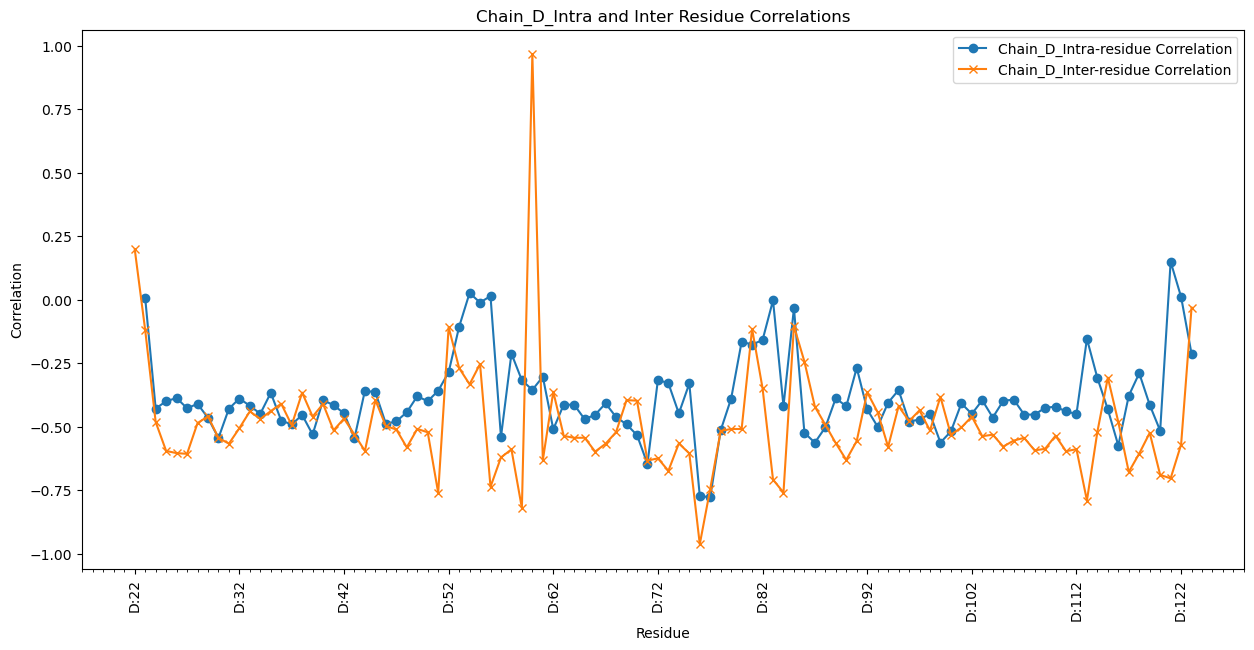

In [8]:
#plot the correlation
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
for chain, i in zip(['A', 'B', 'C', 'D'], range(4)):

    inter_correlation = KcsA_analyzer[i].calculate_inter_residue_correlation()
    intra_correlation = KcsA_analyzer[i].calculate_intra_residue_correlation()
    # Extract residues and their corresponding correlations
    residues = list(intra_correlation.keys())
    intra_values = list(intra_correlation.values())
    inter_values = list(inter_correlation.values())

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15, 7))

    # Plot intra-residue correlations
    ax.plot(residues, intra_values, label=f'Chain_{chain}_Intra-residue Correlation', marker='o')

    # Plot inter-residue correlations
    ax.plot(residues[:-1], inter_values, label=f'Chain_{chain}_Inter-residue Correlation', marker='x')


    # Set labels and title
    ax.set_xlabel('Residue')
    ax.set_ylabel('Correlation')
    ax.set_title(f'Chain_{chain}_Intra and Inter Residue Correlations')
    ax.legend()

    # Set up major and minor tickers
    major_locator = MultipleLocator(10)  # Adjust to the desired spacing of major ticks
    minor_locator = MultipleLocator(1)   # Adjust to the desired spacing of minor ticks

    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)

    # Rotate x-axis labels for better readability and only show for major ticks
    ax.tick_params(axis='x', which='major', labelrotation=90)
    ax.tick_params(axis='x', which='minor', labelbottom=False)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    plt.savefig(f'intra_inter_residue_correlation_chain_{chain}.png', dpi=300, bbox_inches='tight')
    plt.show()

python(6969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Combined plot saved as KcsA_Rama_plots_chainA/Combined_Ramachandran_1k4c.png


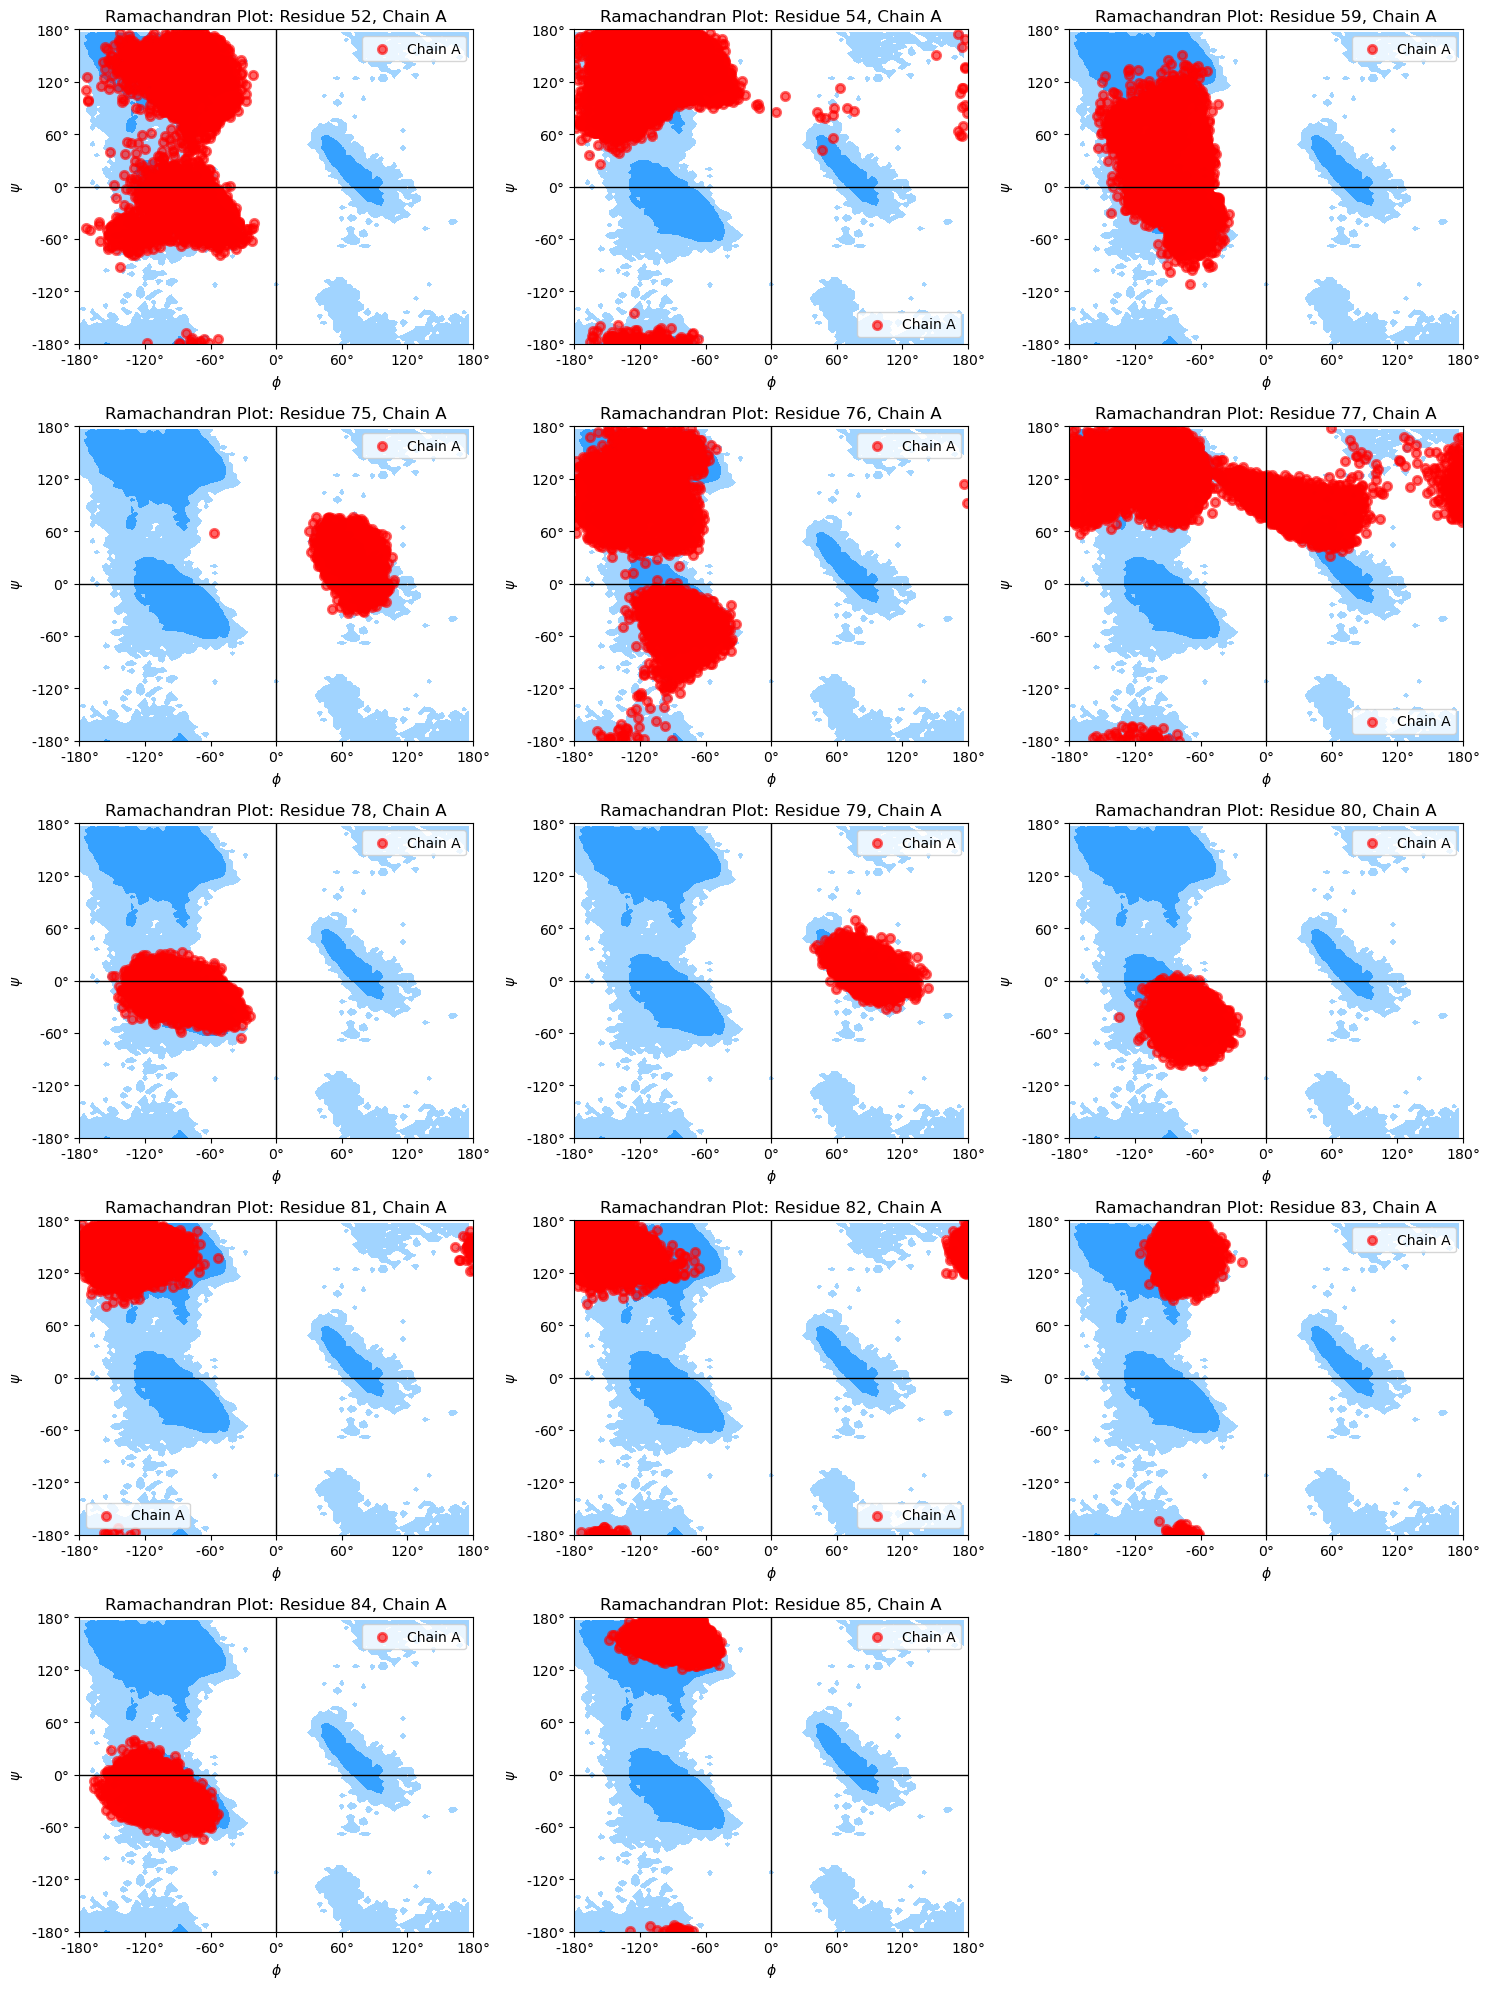

Combined plot saved as KcsA_Rama_plots_chainB/Combined_Ramachandran_1k4c.png


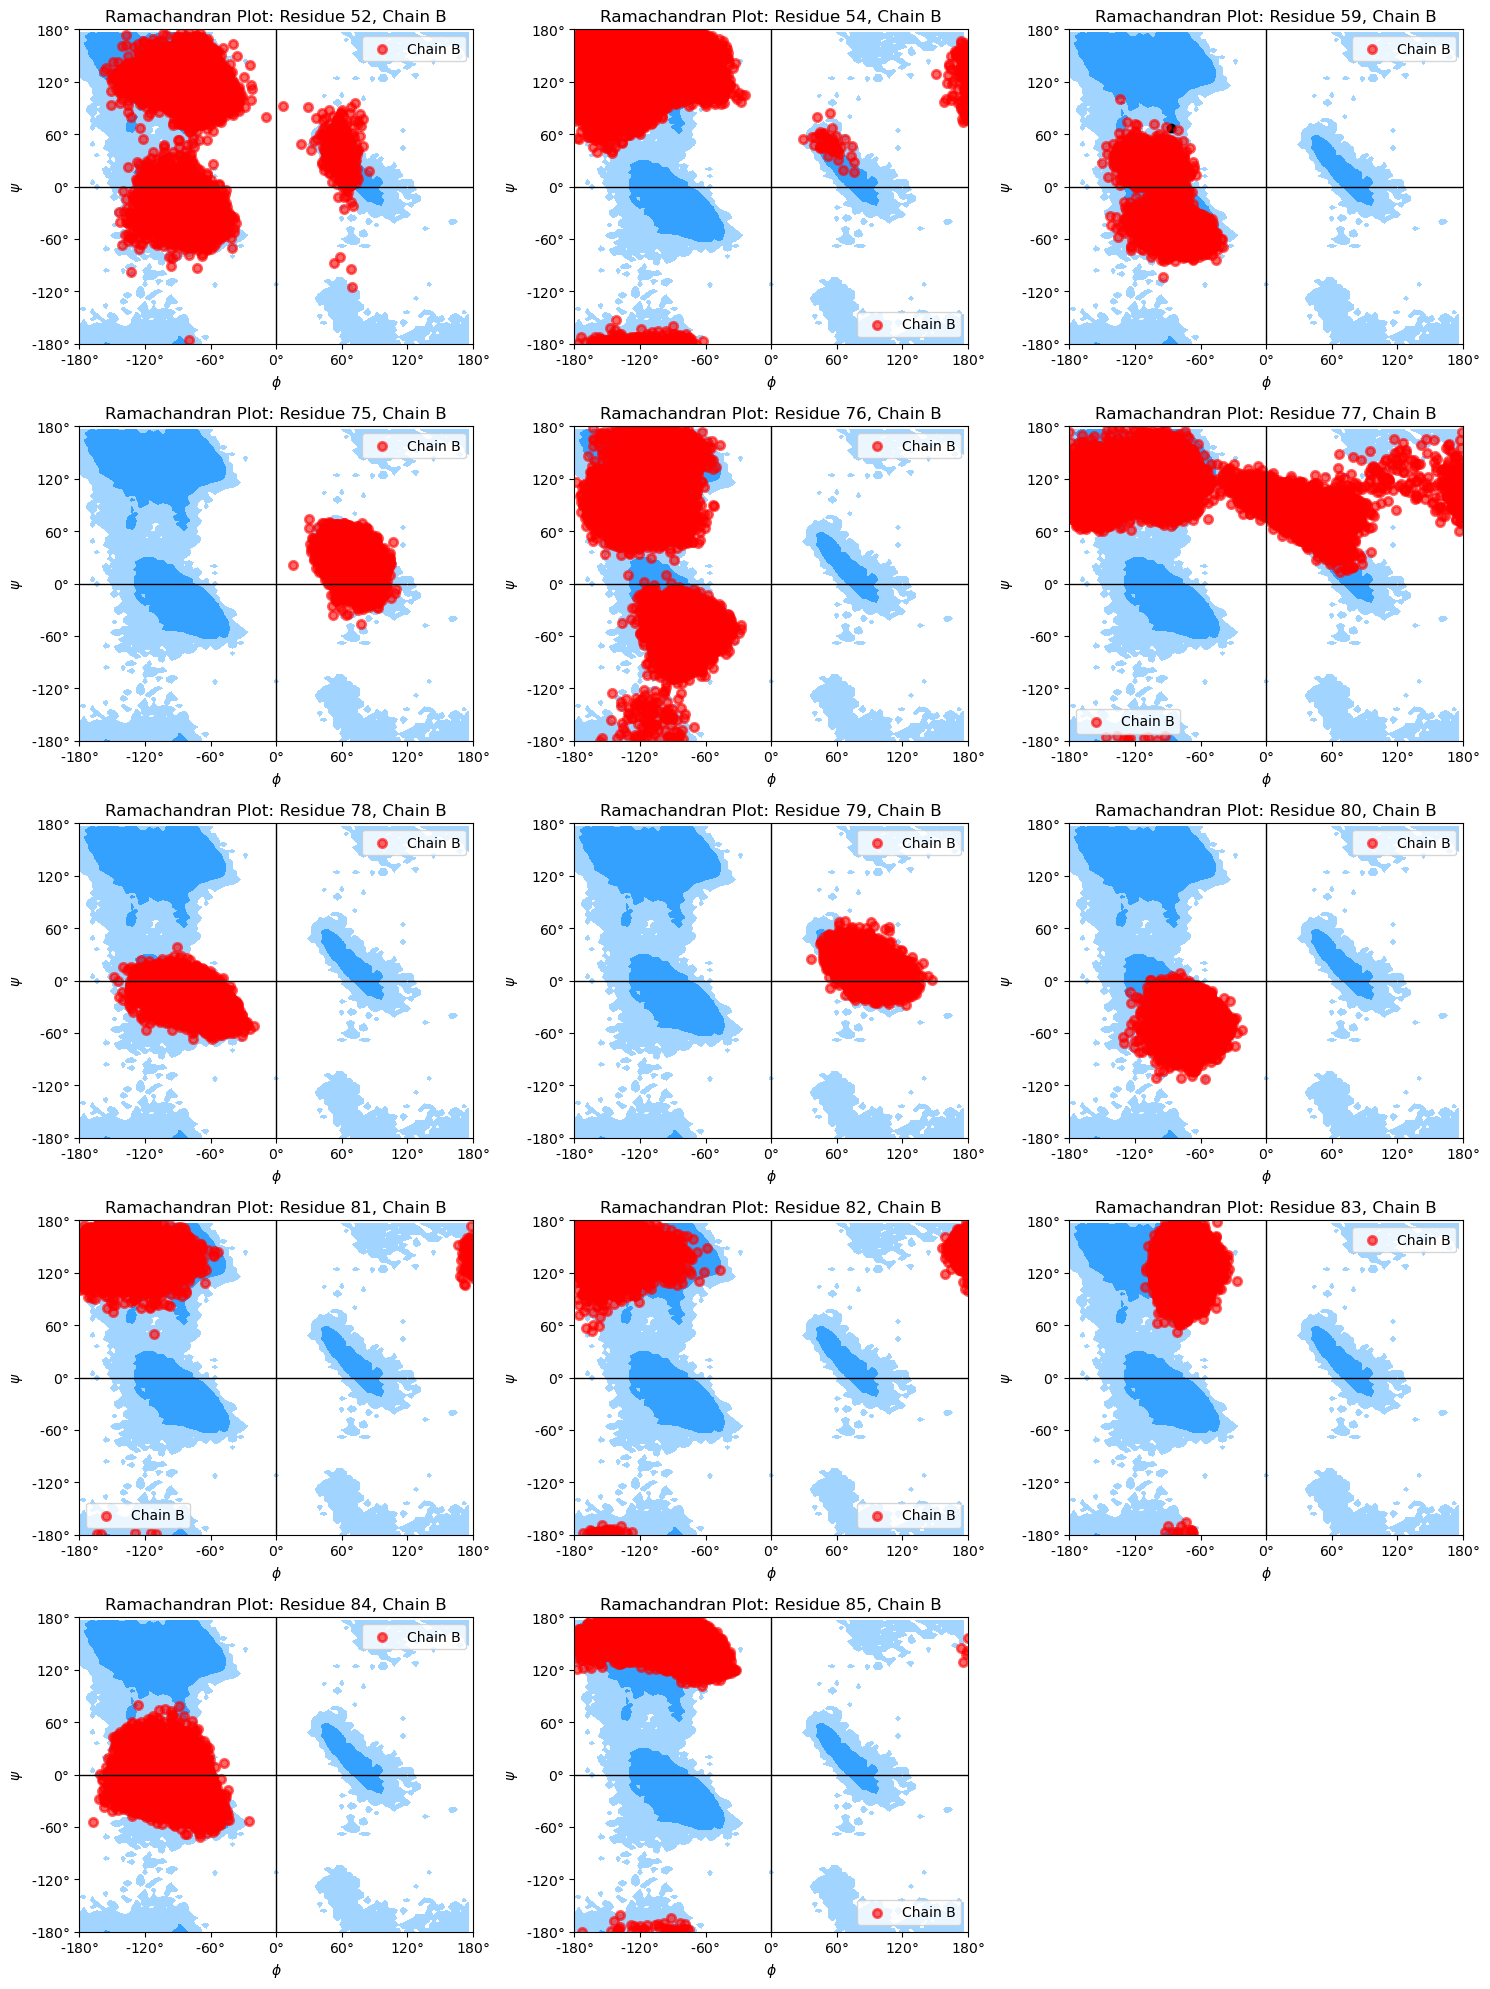

Combined plot saved as KcsA_Rama_plots_chainC/Combined_Ramachandran_1k4c.png


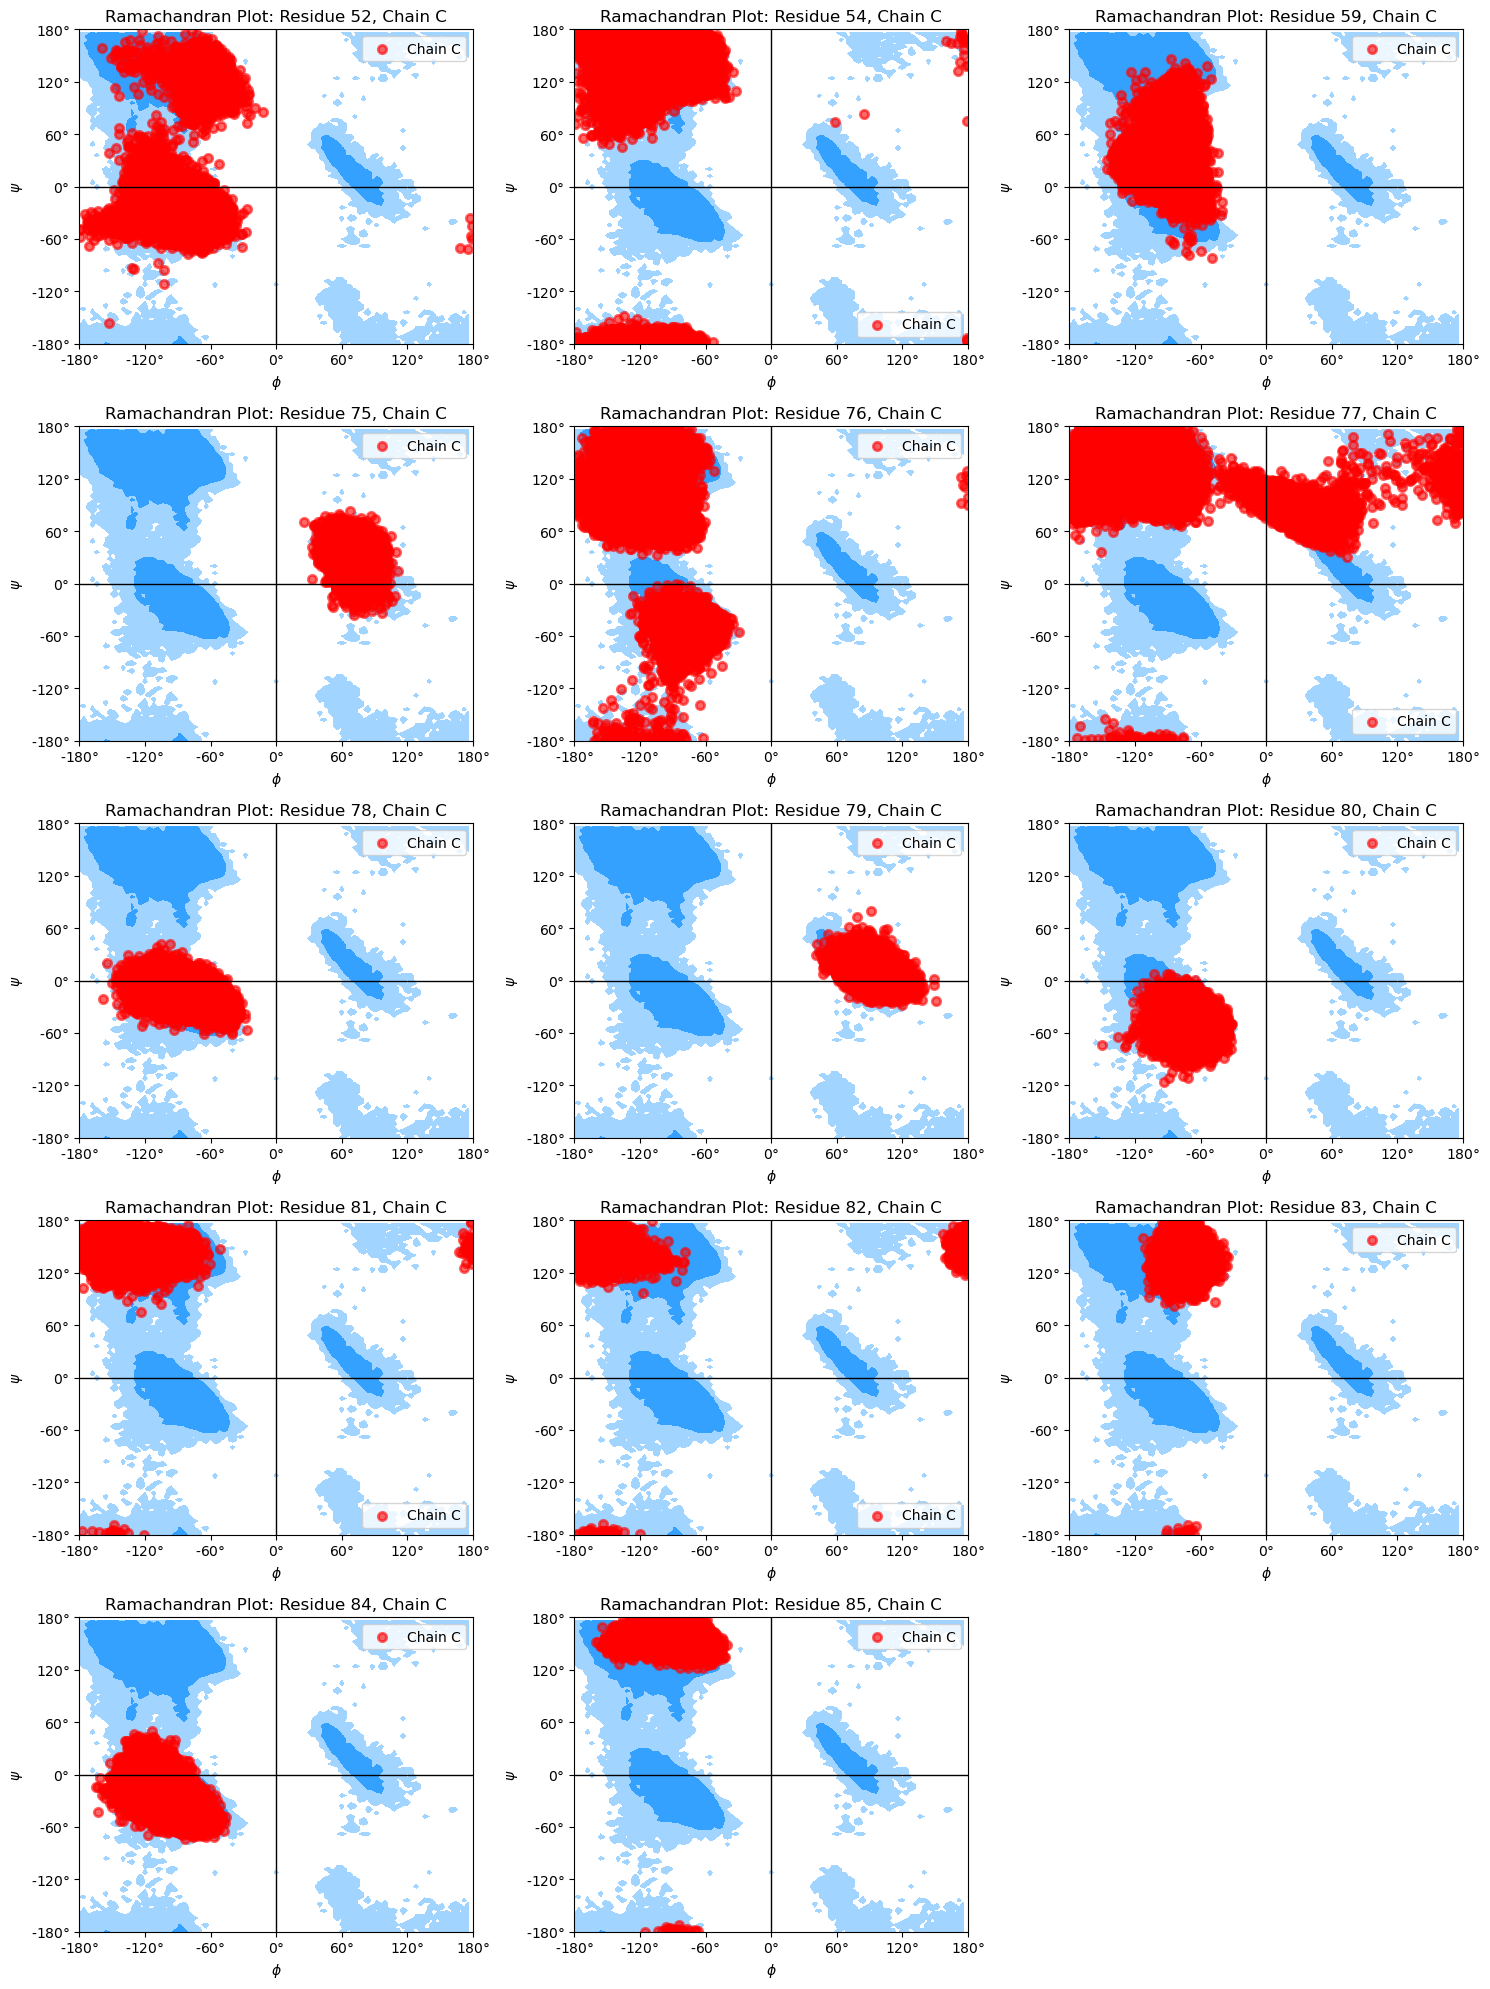

Combined plot saved as KcsA_Rama_plots_chainD/Combined_Ramachandran_1k4c.png


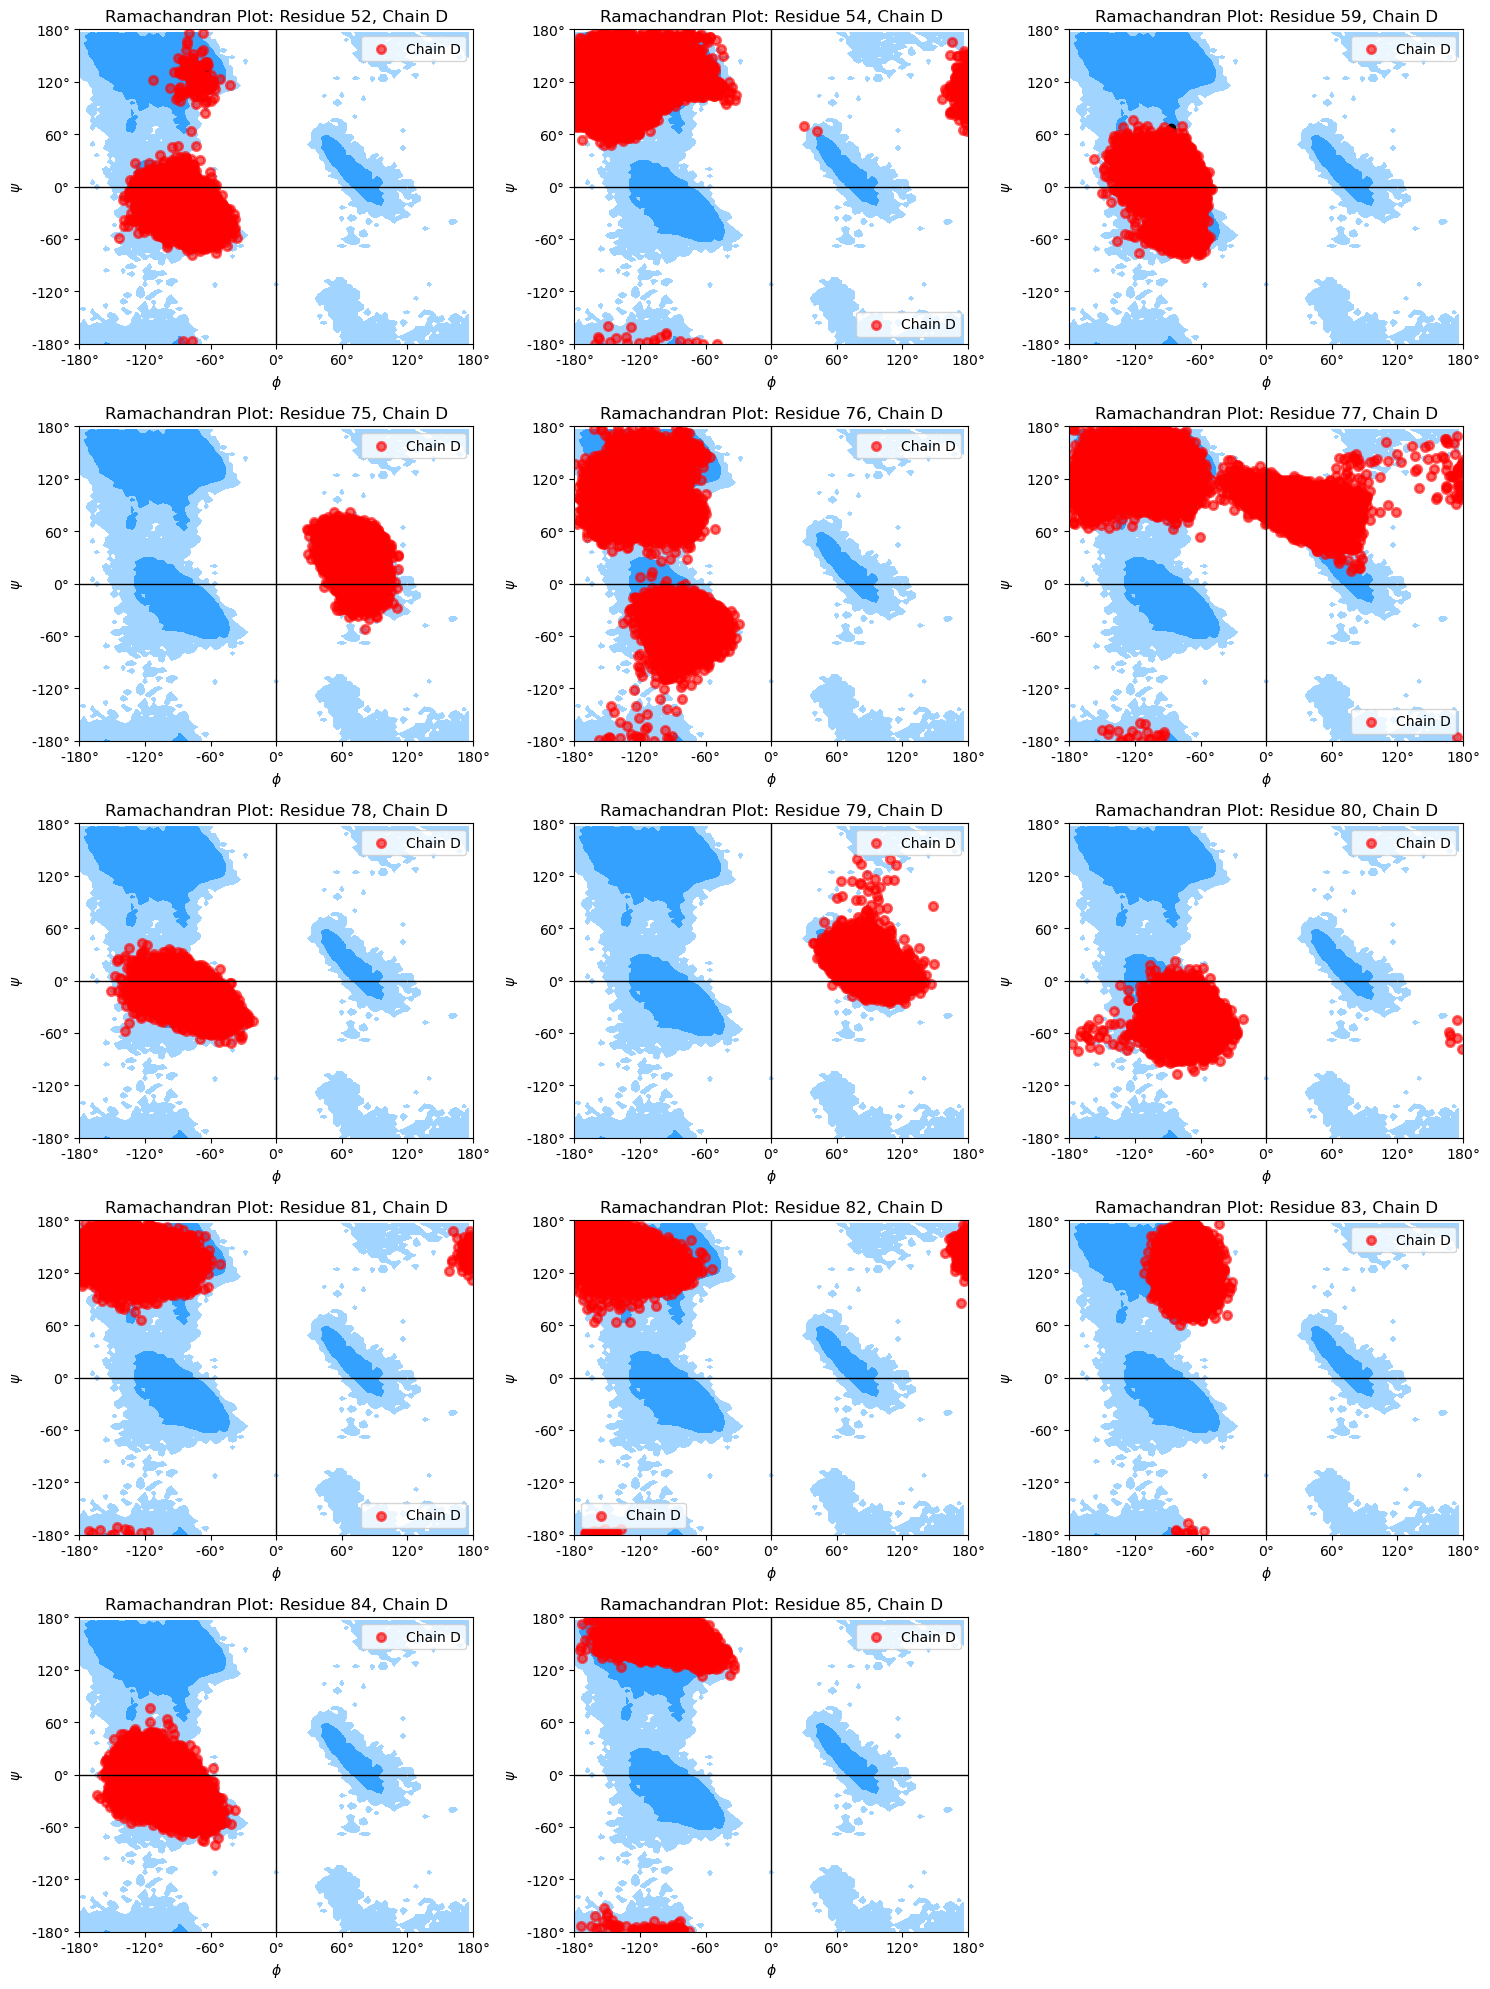

In [9]:
# plot residue torsion angles over Ramachandran plot
residues_to_plot=[52, 54, 59, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
#chains=['A']
#DHFR_analyzer.plot_ramachandran(residue_index='23', PDB_code='1rx1', chain='A', output_dir='DHFR_Rama_plots2') 
for chain, i in zip(['A', 'B', 'C', 'D'], range(4)):
#for chain, i in zip(['D'], [3]):
    KcsA_analyzer[i].plot_all_ramachandran(residue_indices=residues_to_plot, PDB_code='1k4c', PDB_chain='C', chains=[chain], output_dir=f'KcsA_Rama_plots_chain{chain}')

Combined plot saved as KcsA_scatter_plots_ChainA/inter_intra_torsion_scatter_52.png


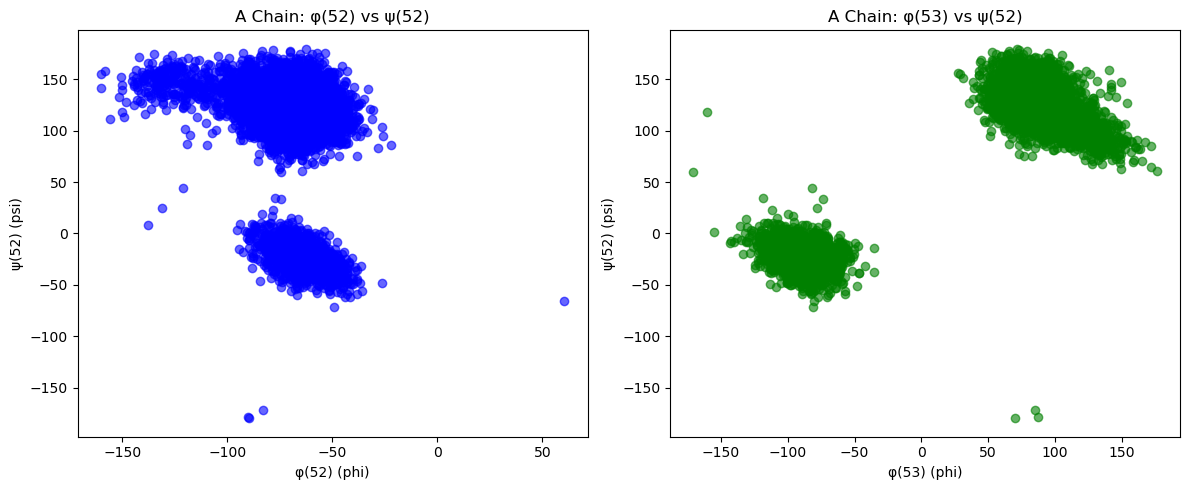

Combined plot saved as KcsA_scatter_plots_ChainA/inter_intra_torsion_scatter_76.png


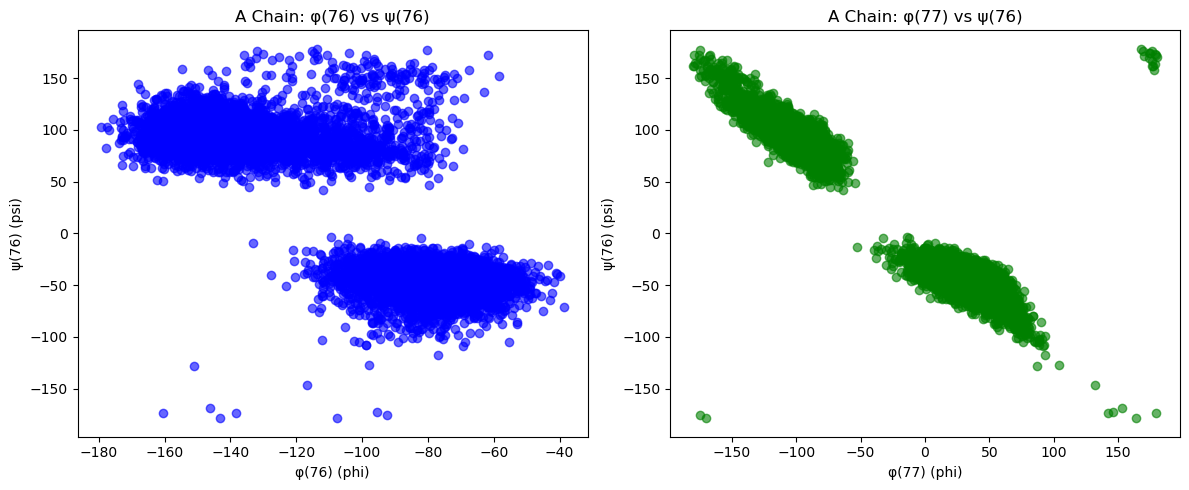

Combined plot saved as KcsA_scatter_plots_ChainA/inter_intra_torsion_scatter_77.png


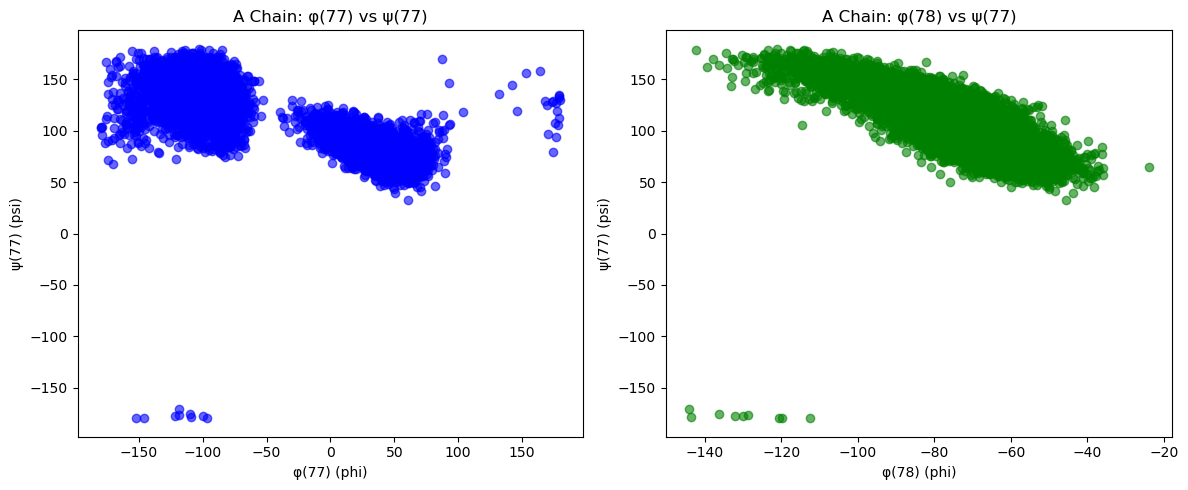

In [9]:
residues_to_plot=[52,76, 77]
for residue in residues_to_plot:
    KcsA_analyzer[0].plot_scatter(residue, chains='A', output_dir='KcsA_scatter_plots_ChainA')

Combined plot saved as KcssA_scatter_plots_ChainB/inter_intra_torsion_scatter_52.png


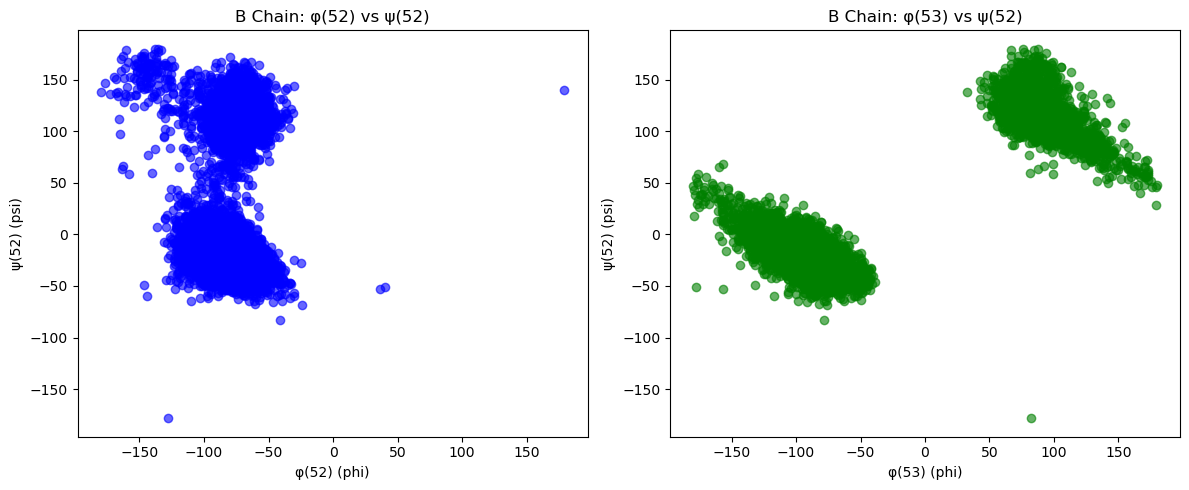

Combined plot saved as KcssA_scatter_plots_ChainB/inter_intra_torsion_scatter_76.png


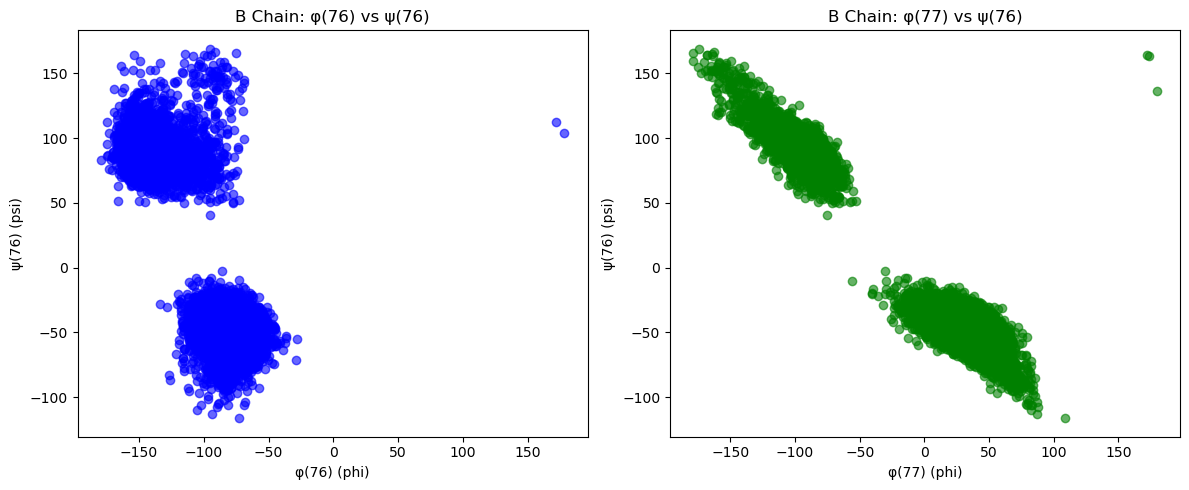

Combined plot saved as KcssA_scatter_plots_ChainB/inter_intra_torsion_scatter_77.png


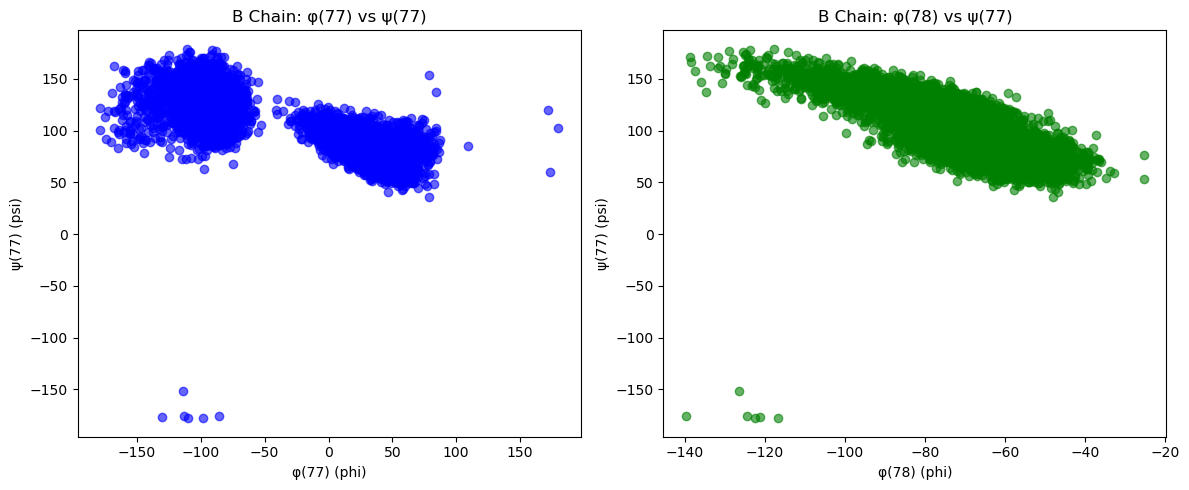

In [10]:
residues_to_plot=[52, 76, 77]
for residue in residues_to_plot:
    KcsA_analyzer[1].plot_scatter(residue, chains='B', output_dir='KcssA_scatter_plots_ChainB')

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_52.png


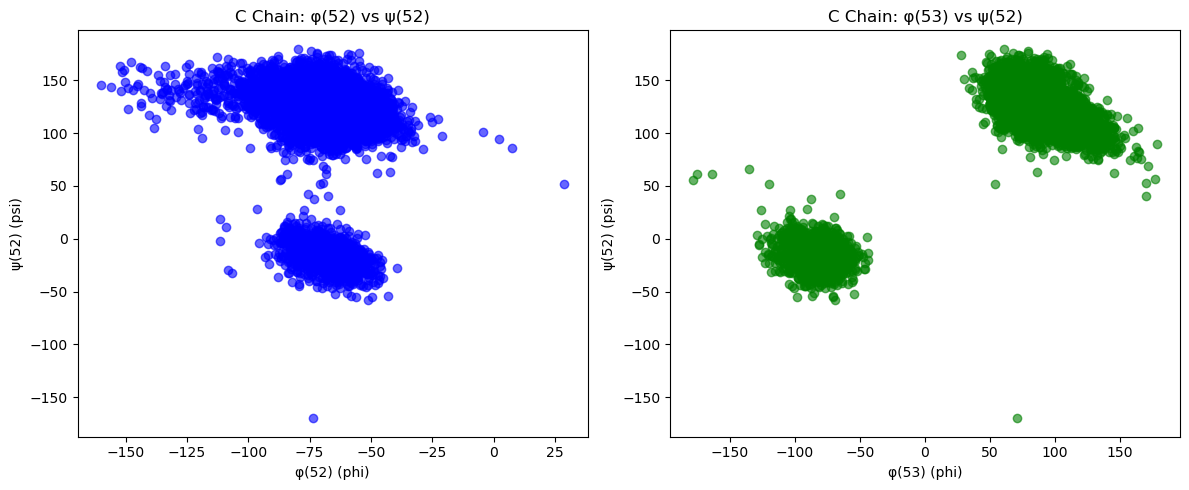

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_76.png


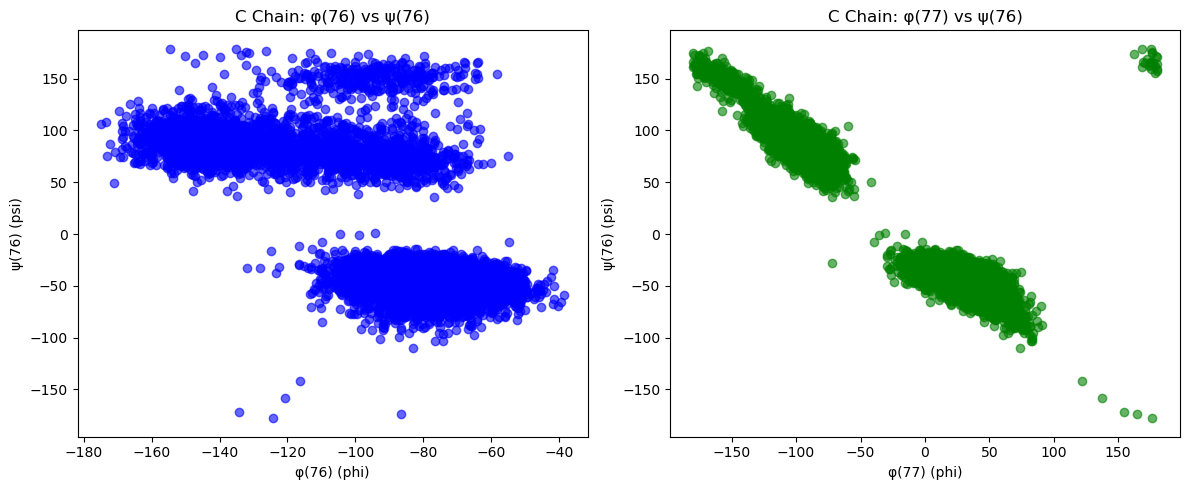

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_77.png


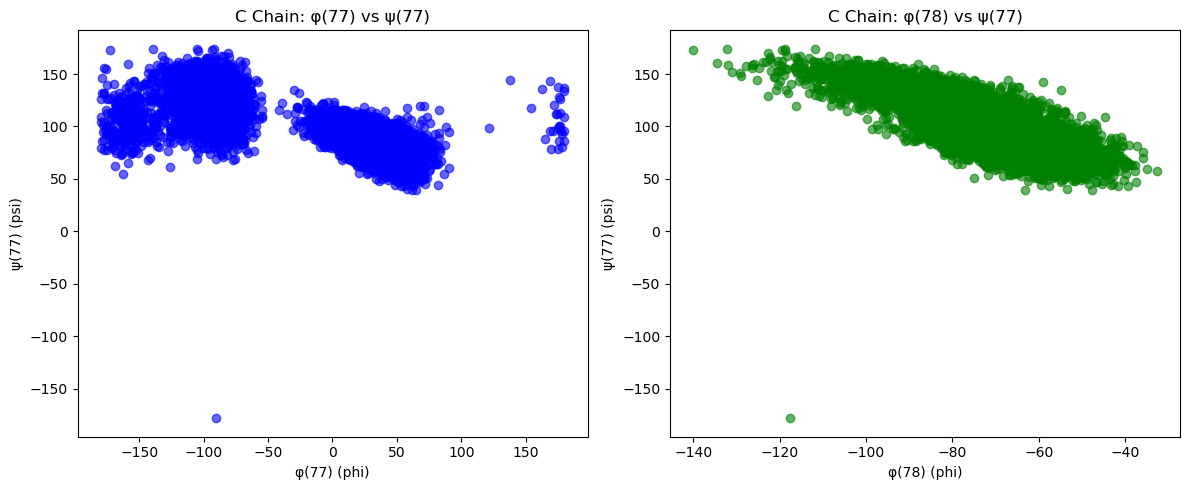

In [11]:
residues_to_plot=[52, 76, 77]
for residue in residues_to_plot:
    KcsA_analyzer[2].plot_scatter(residue, chains='C', output_dir='KcssA_scatter_plots_ChainC')

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_52.png


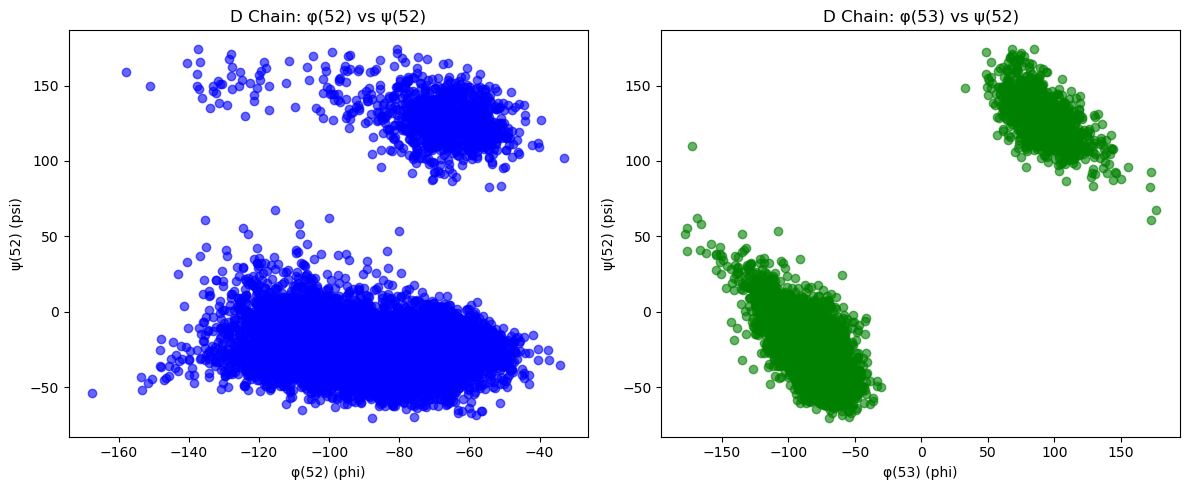

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_54.png


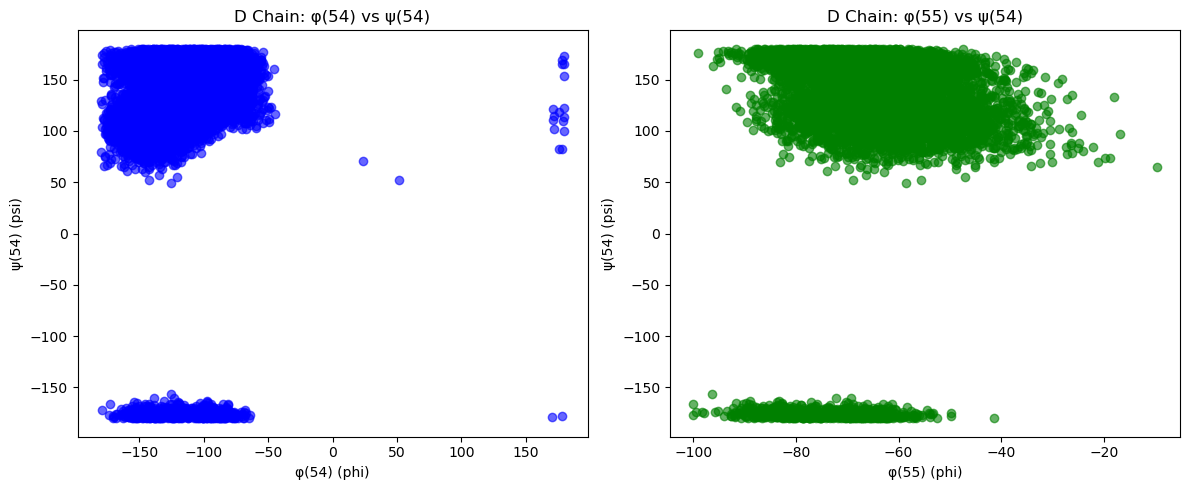

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_76.png


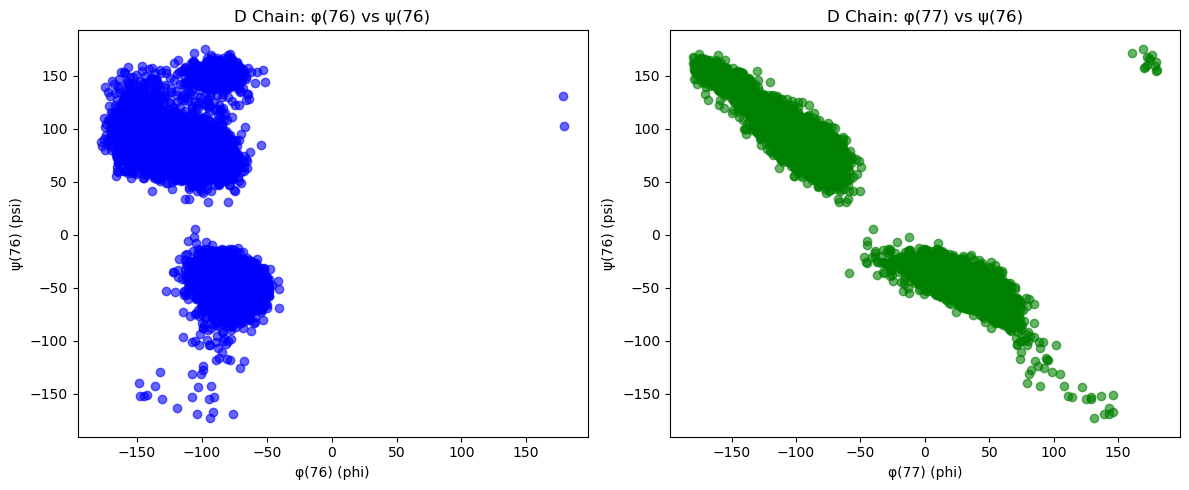

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_77.png


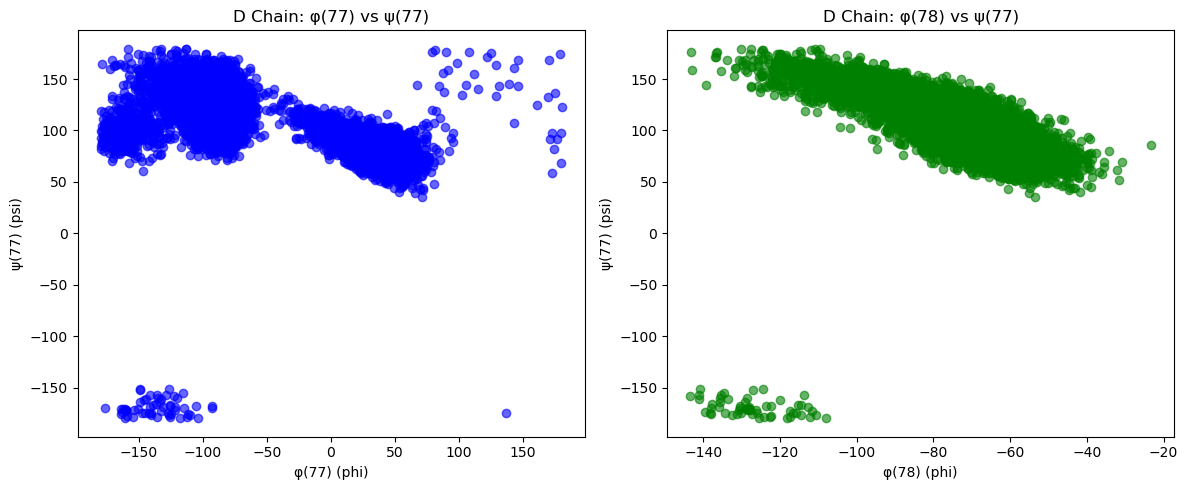

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_78.png


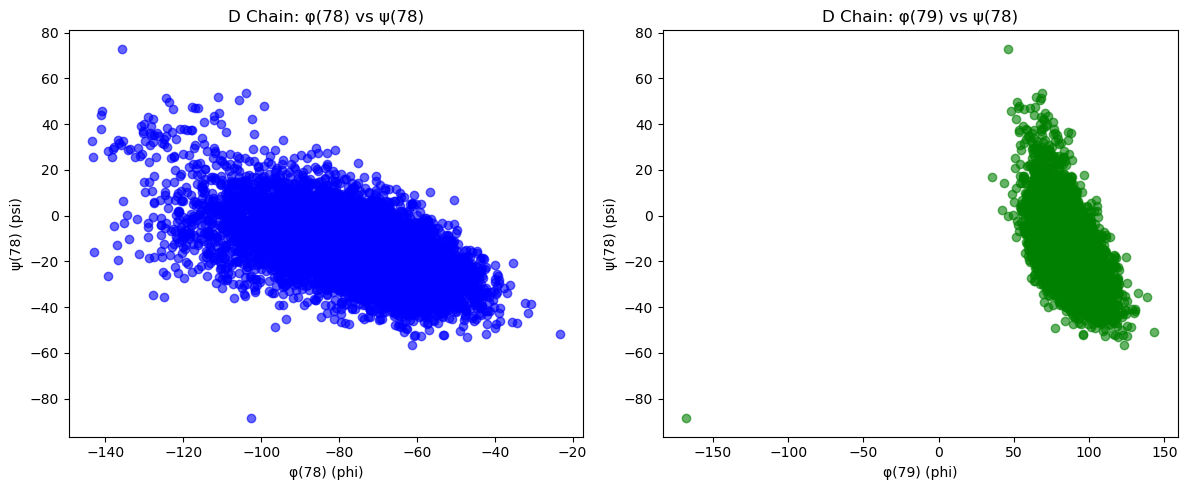

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_79.png


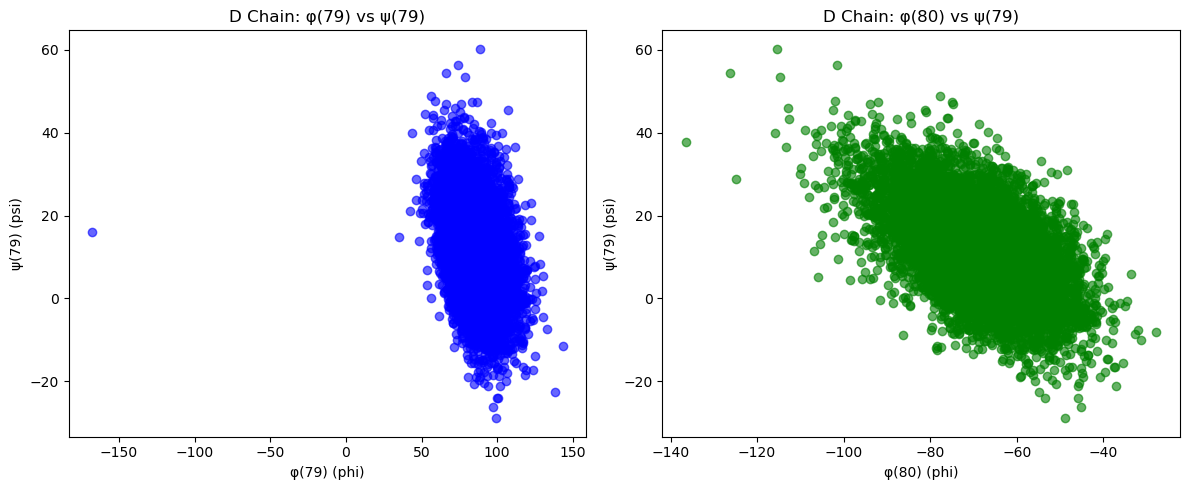

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_80.png


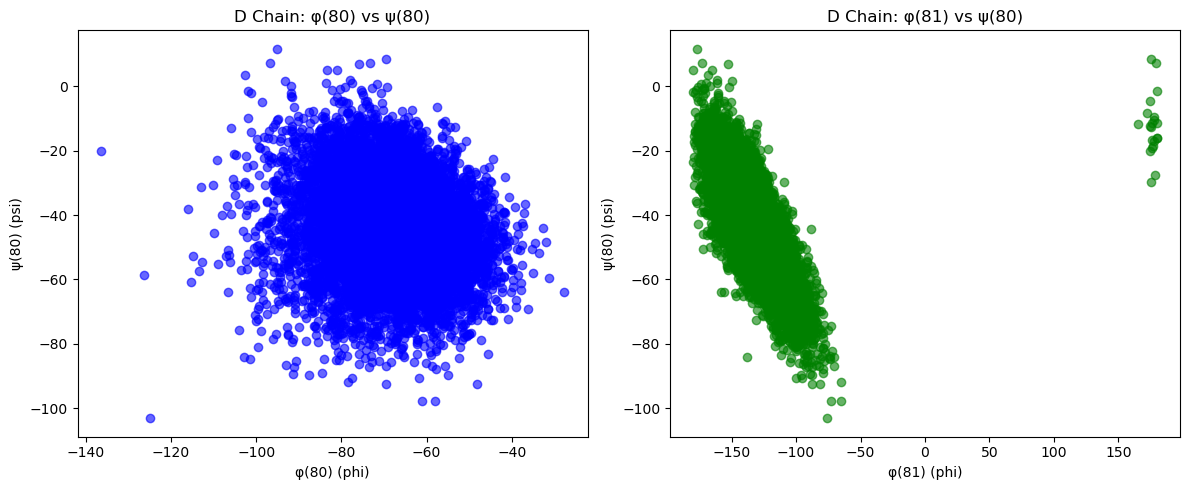

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_81.png


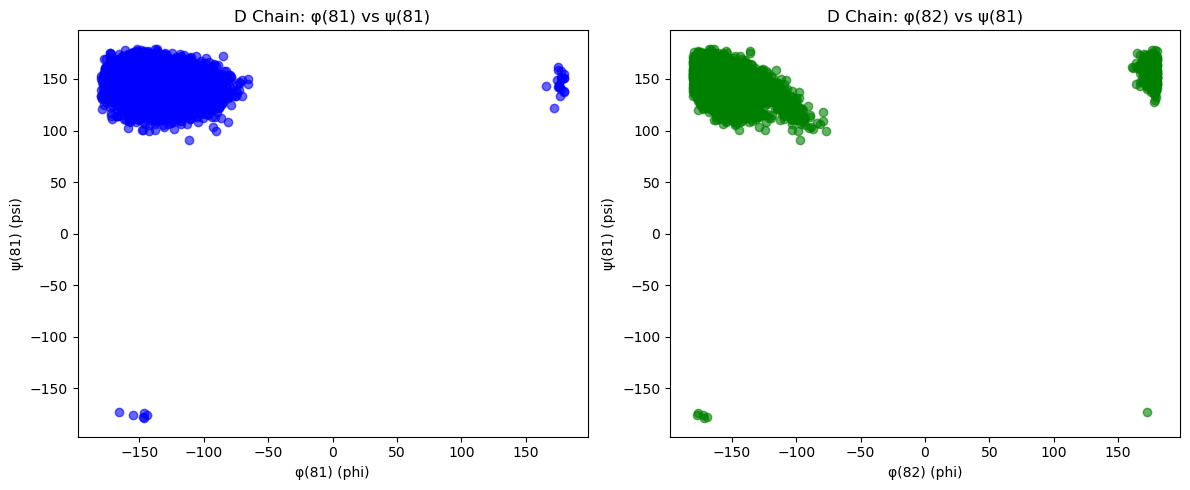

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_82.png


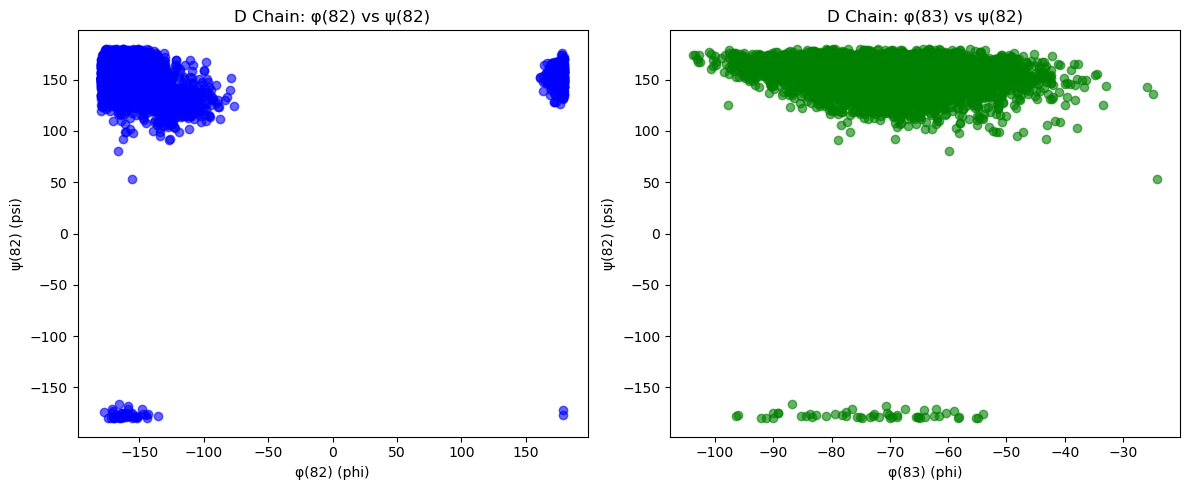

In [12]:
residues_to_plot=[52, 54, 76,77, 78, 79, 80,81, 82]
for residue in residues_to_plot:
    KcsA_analyzer[3].plot_scatter(residue, chains='D', output_dir='KcssA_scatter_plots_ChainD')

Plot saved as KcsA_torsion_vs_time_ChainA/Torsion_vs_Time_Residue_52_Chain_A.png


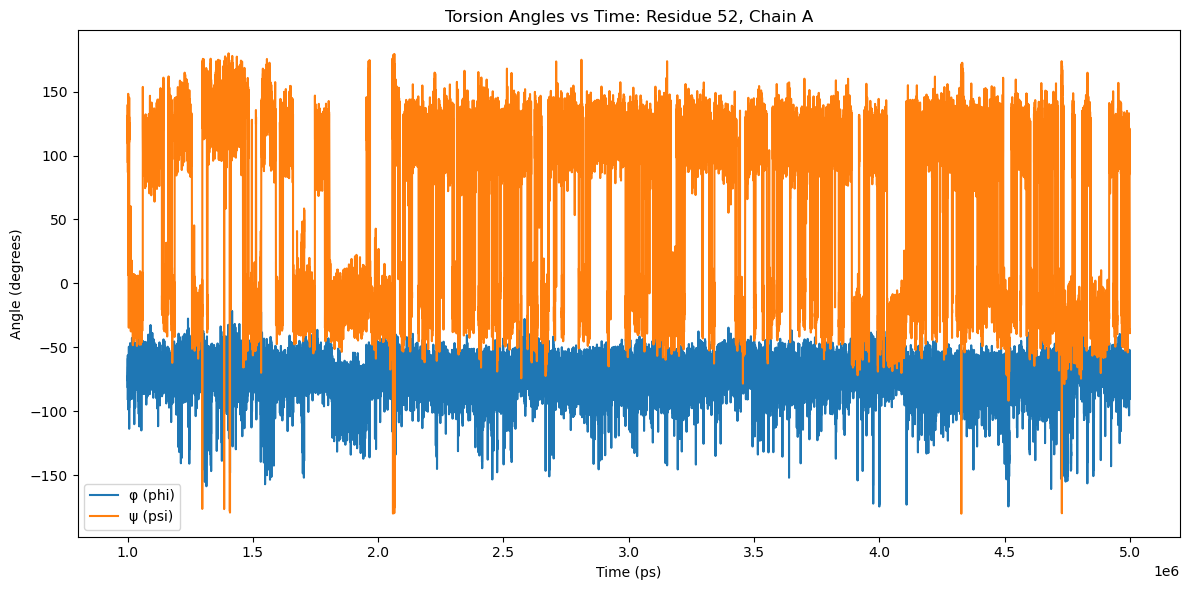

Plot saved as KcsA_inter_torsion_vs_time_ChainA/Inter_Torsion_vs_Time_Residue_52_Chain_A.png


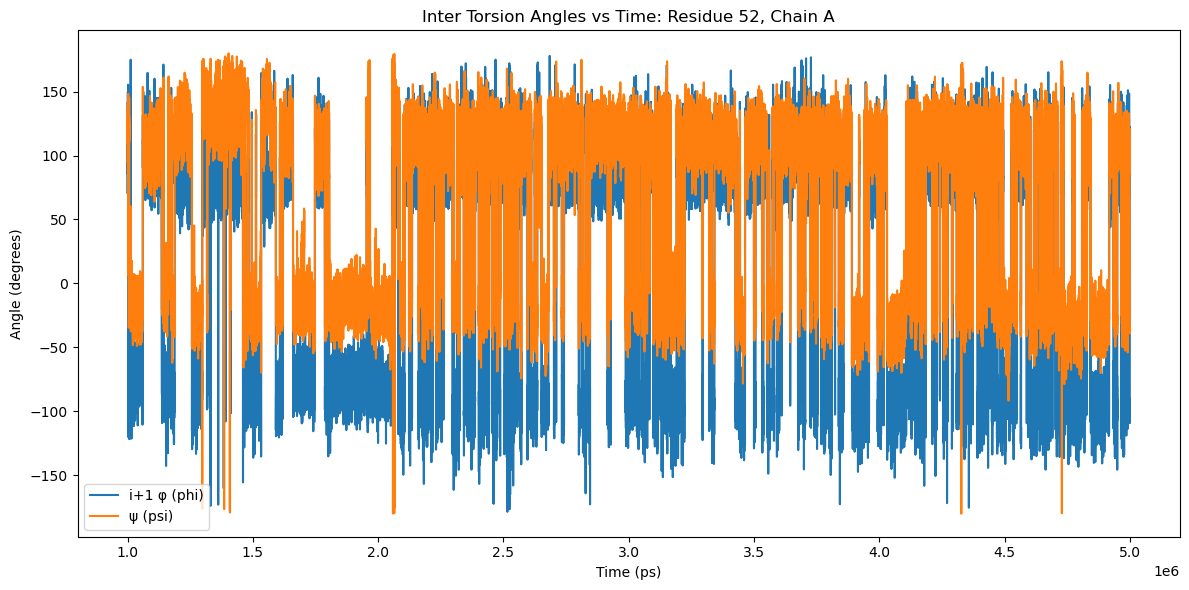

Plot saved as KcsA_torsion_vs_time_ChainA/Torsion_vs_Time_Residue_76_Chain_A.png


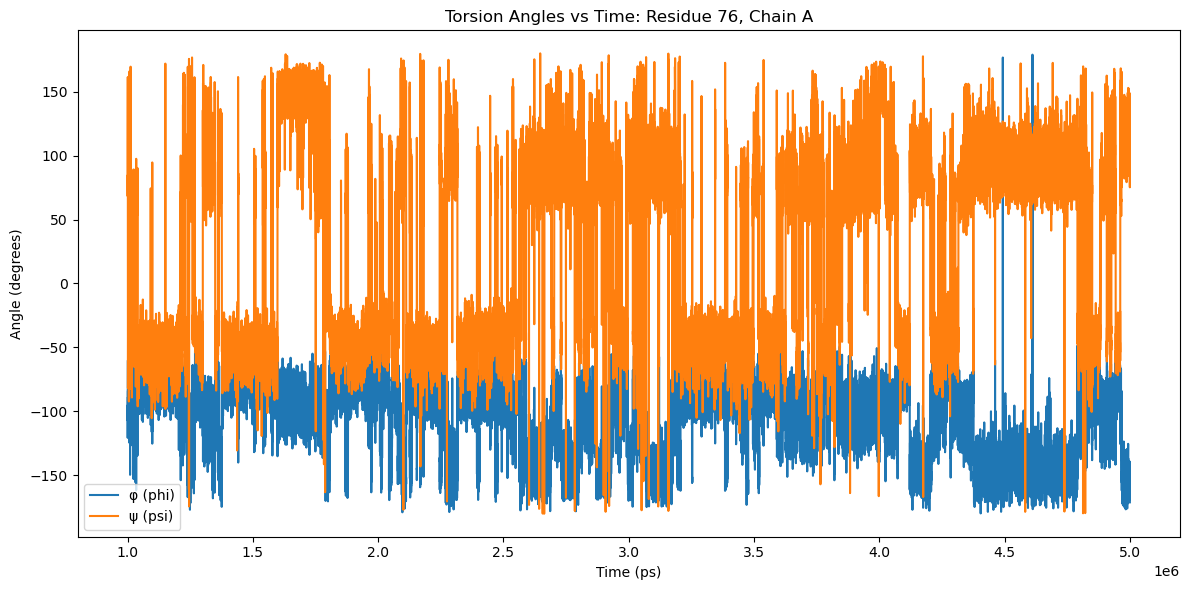

Plot saved as KcsA_inter_torsion_vs_time_ChainA/Inter_Torsion_vs_Time_Residue_76_Chain_A.png


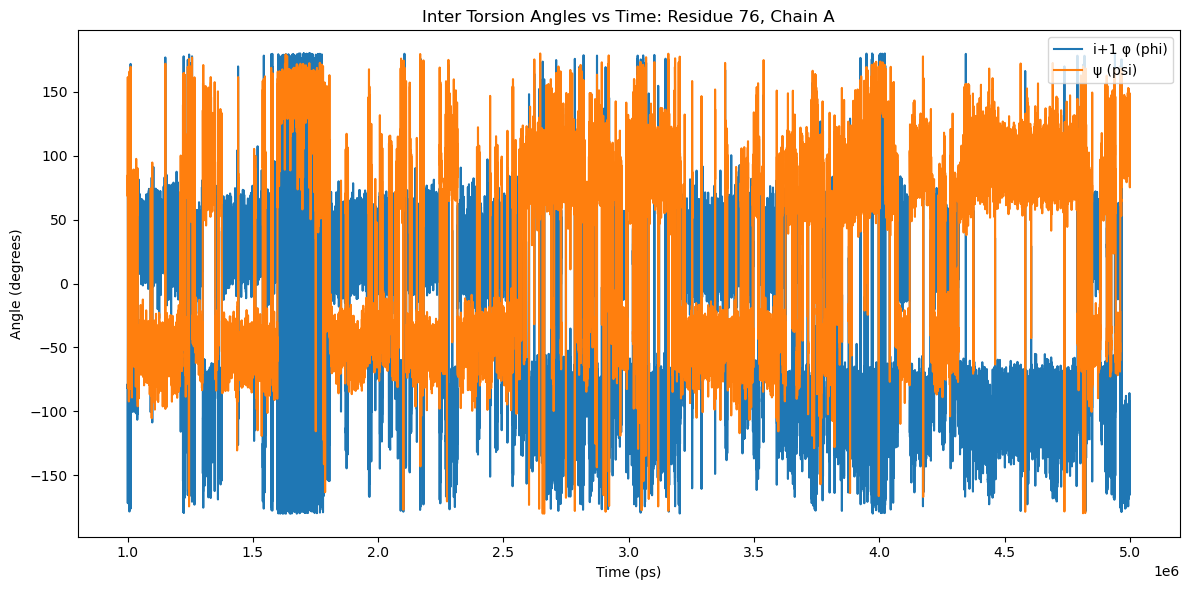

Plot saved as KcsA_torsion_vs_time_ChainA/Torsion_vs_Time_Residue_77_Chain_A.png


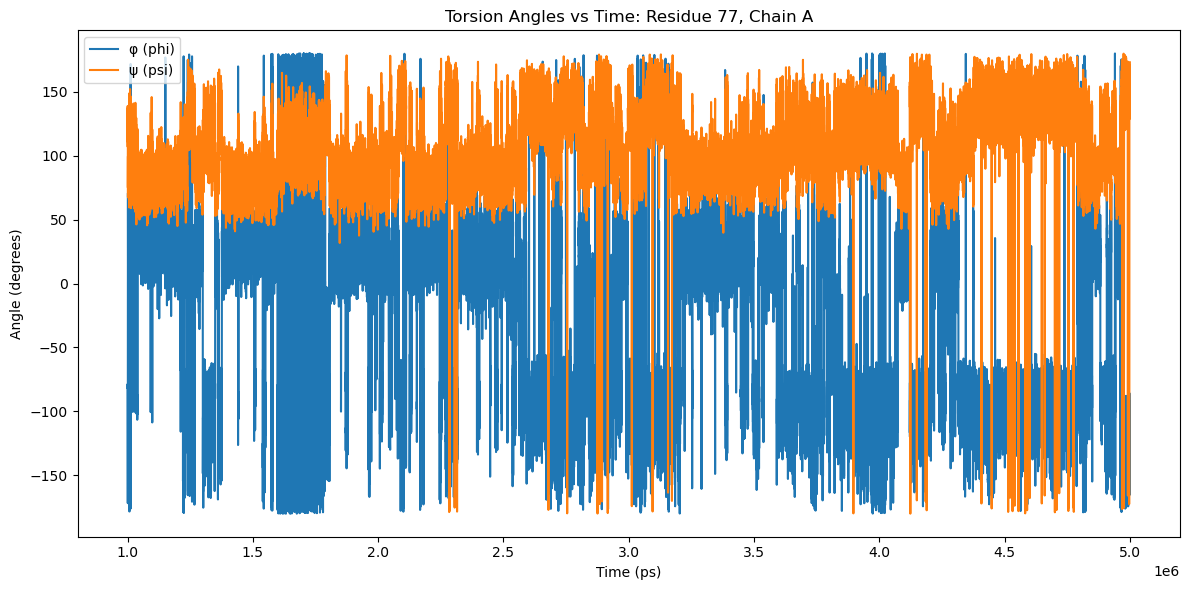

Plot saved as KcsA_inter_torsion_vs_time_ChainA/Inter_Torsion_vs_Time_Residue_77_Chain_A.png


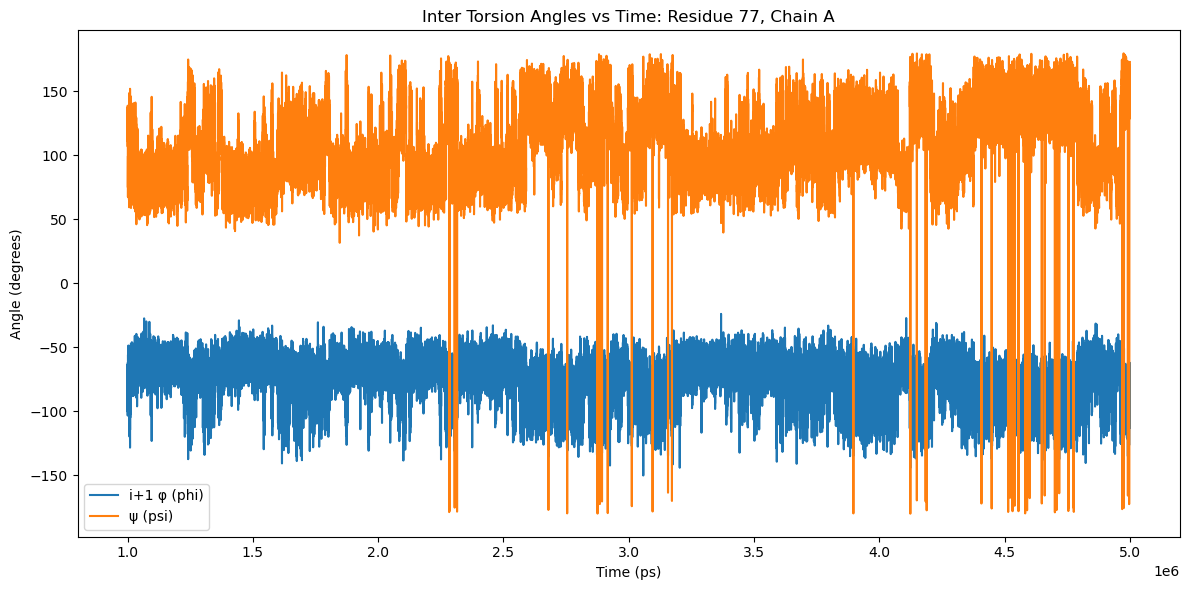

In [10]:
from torsion_analysis_module2 import *
# import plot functions to plot torsion angles(intra and inter) vs time 

# plot the torsion angles over time
residues_to_plot=[52, 76, 77]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='A', analyzer=KcsA_analyzer[0], output_dir='KcsA_torsion_vs_time_ChainA')
    plot_inter_torsion_vs_time(residue=residue, chain='A', analyzer=KcsA_analyzer[0], output_dir='KcsA_inter_torsion_vs_time_ChainA')

Plot saved as KcsA_torsion_vs_time_ChainB/Torsion_vs_Time_Residue_52_Chain_B.png


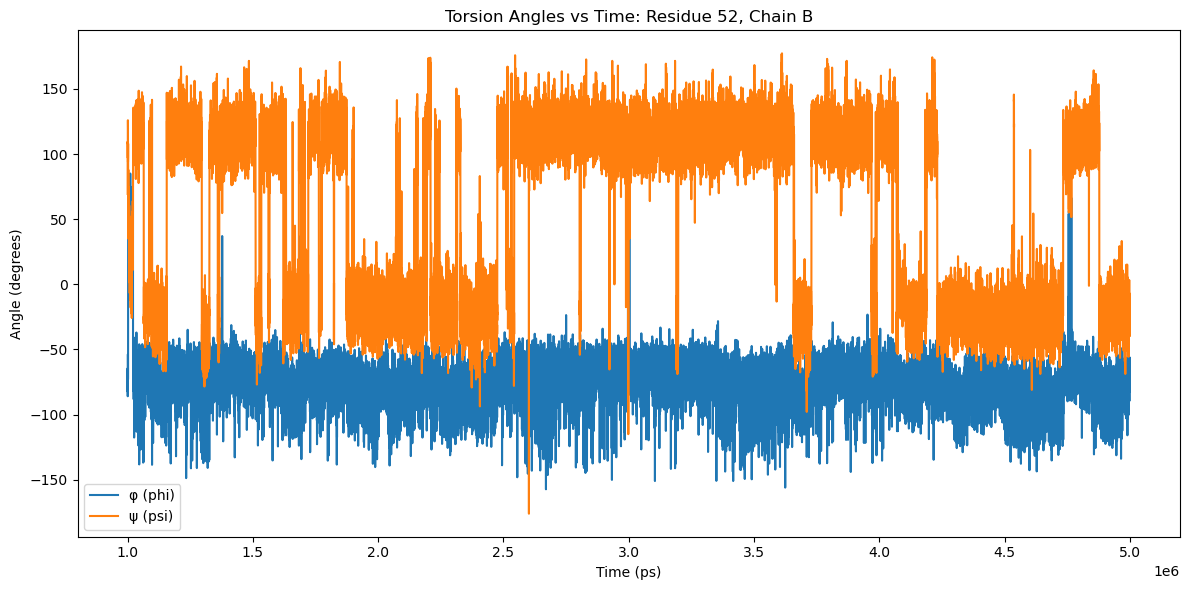

Plot saved as KcsA_inter_torsion_vs_time_ChainB/Inter_Torsion_vs_Time_Residue_52_Chain_B.png


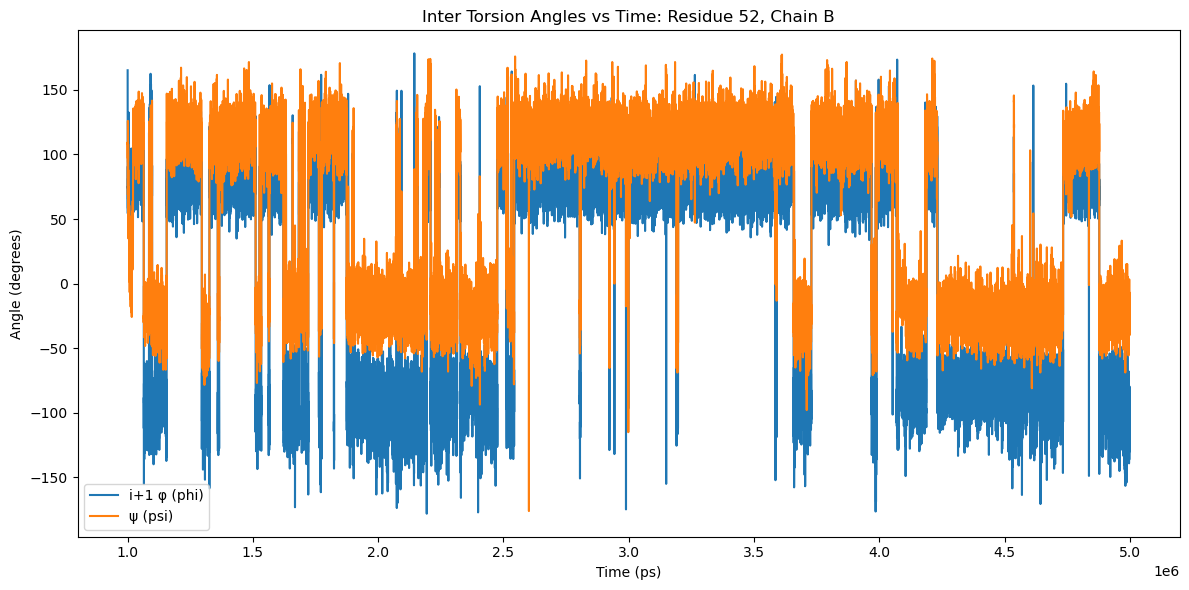

Plot saved as KcsA_torsion_vs_time_ChainB/Torsion_vs_Time_Residue_76_Chain_B.png


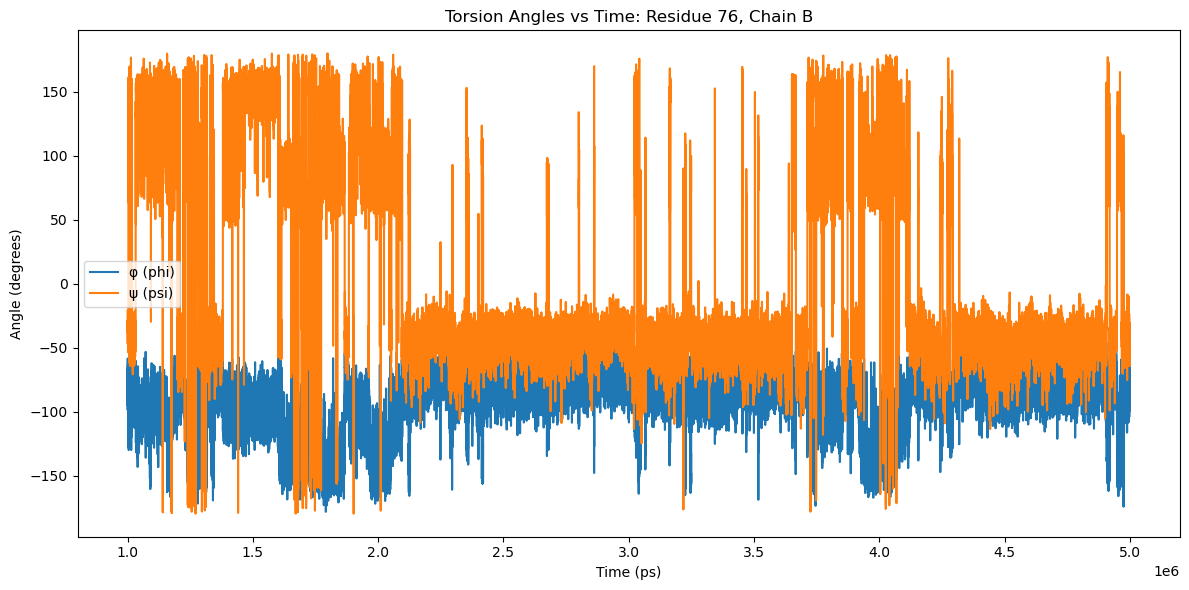

Plot saved as KcsA_inter_torsion_vs_time_ChainB/Inter_Torsion_vs_Time_Residue_76_Chain_B.png


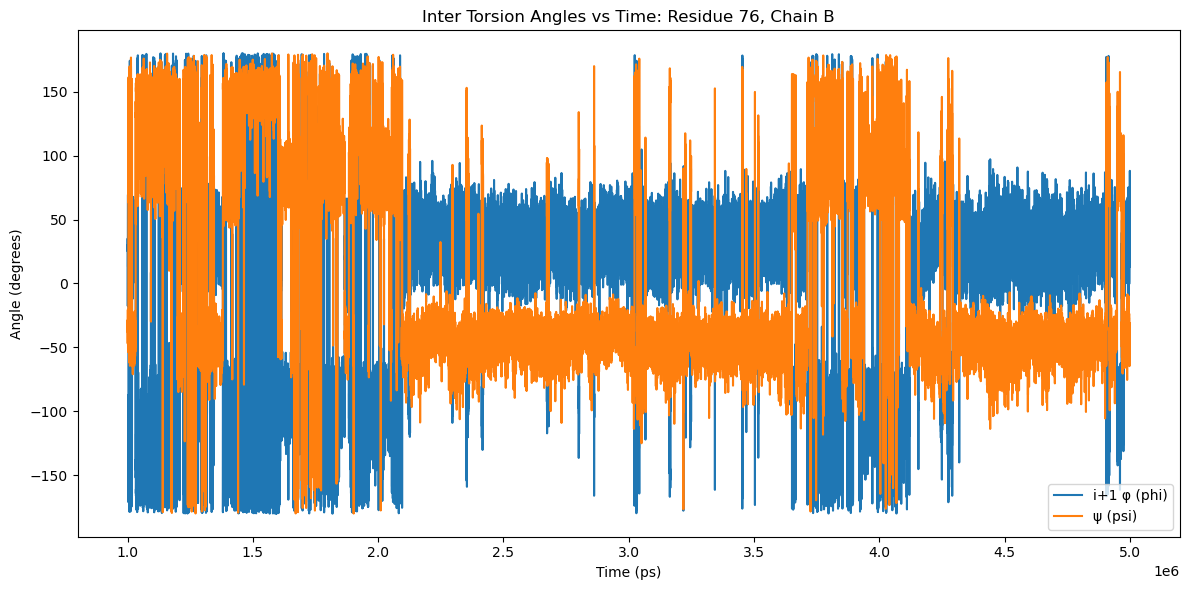

Plot saved as KcsA_torsion_vs_time_ChainB/Torsion_vs_Time_Residue_77_Chain_B.png


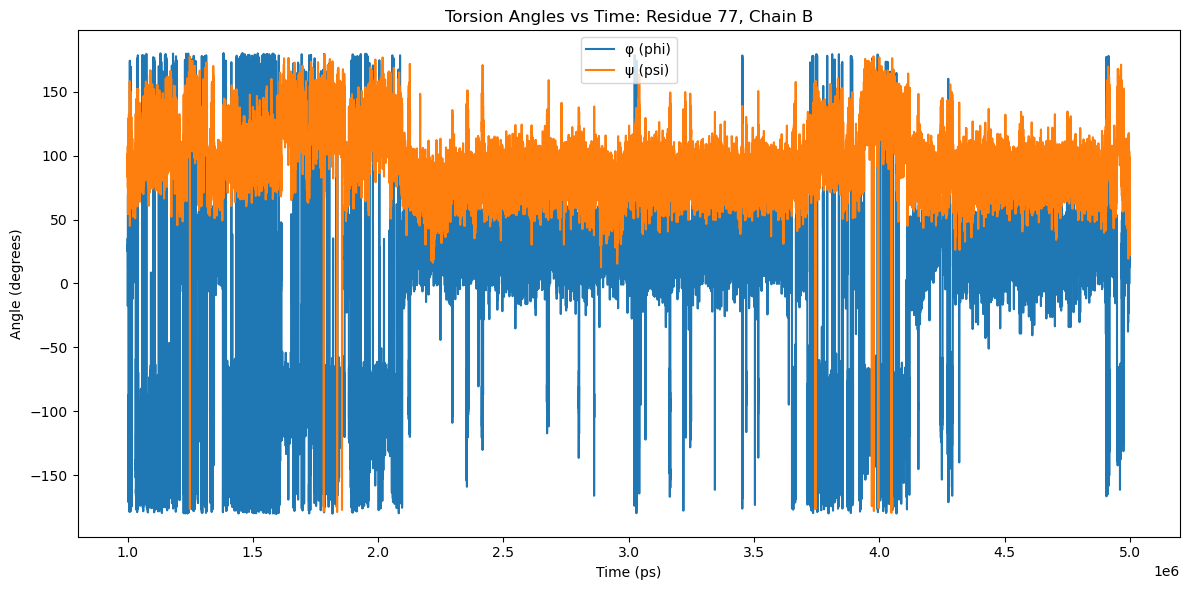

Plot saved as KcsA_inter_torsion_vs_time_ChainB/Inter_Torsion_vs_Time_Residue_77_Chain_B.png


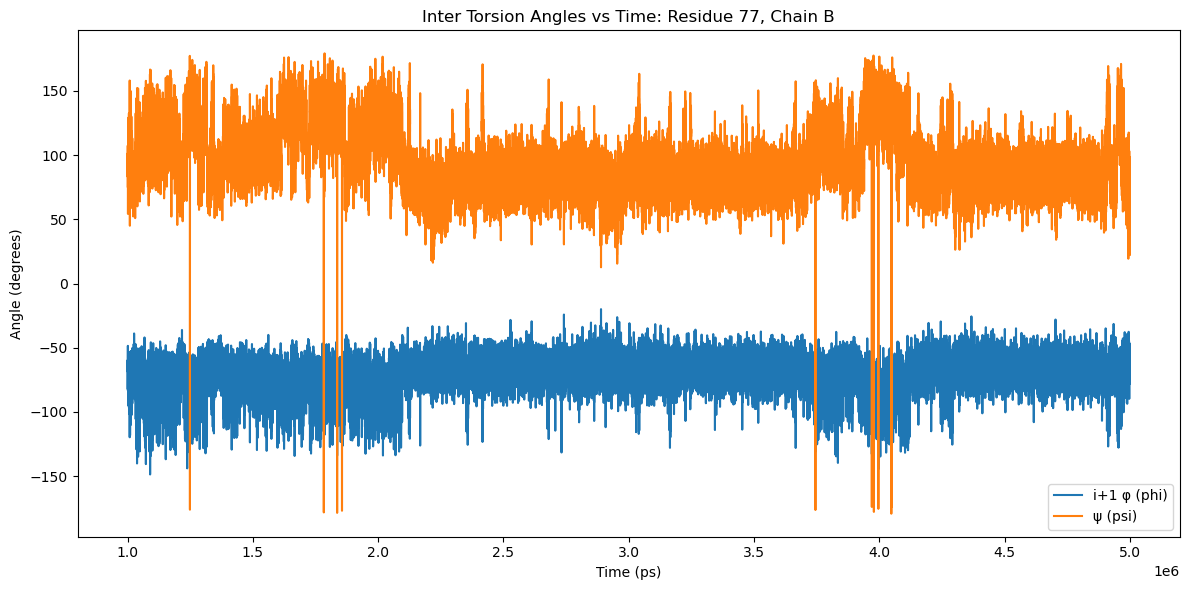

In [11]:
residues_to_plot=[52, 76, 77]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='B', analyzer=KcsA_analyzer[1], output_dir='KcsA_torsion_vs_time_ChainB')
    plot_inter_torsion_vs_time(residue=residue, chain='B', analyzer=KcsA_analyzer[1], output_dir='KcsA_inter_torsion_vs_time_ChainB')

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_52_Chain_C.png


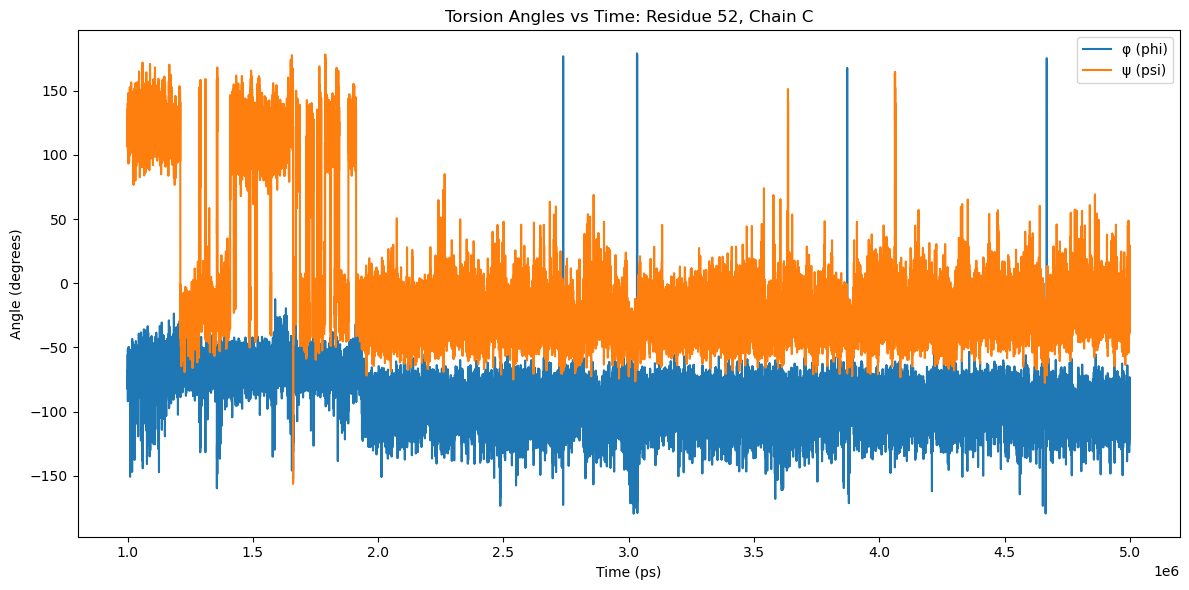

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_52_Chain_C.png


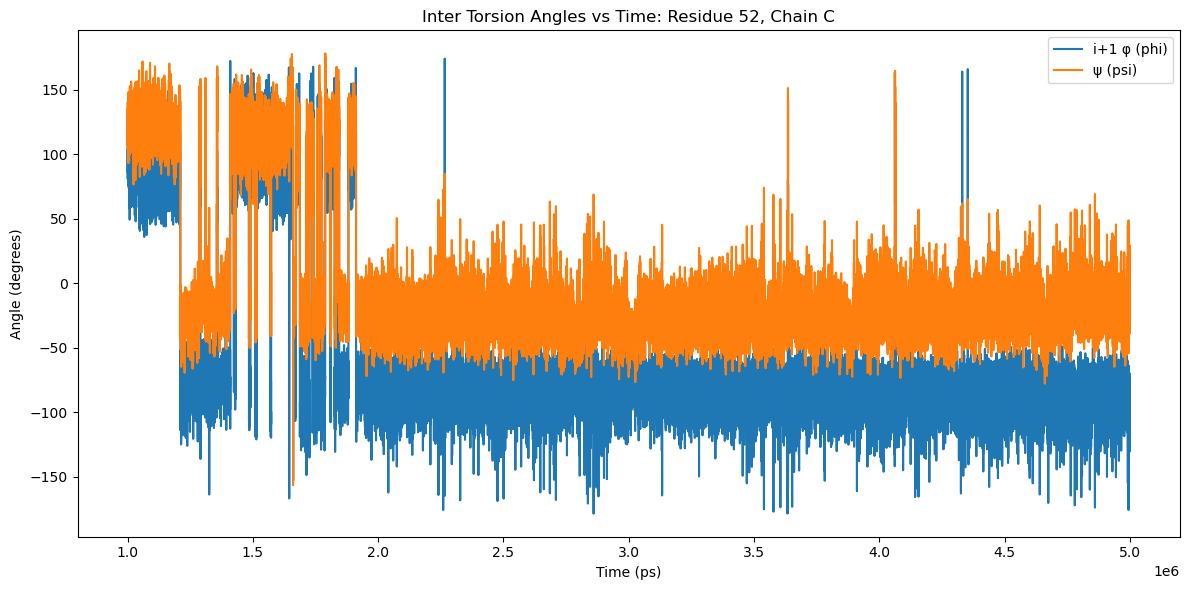

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_76_Chain_C.png


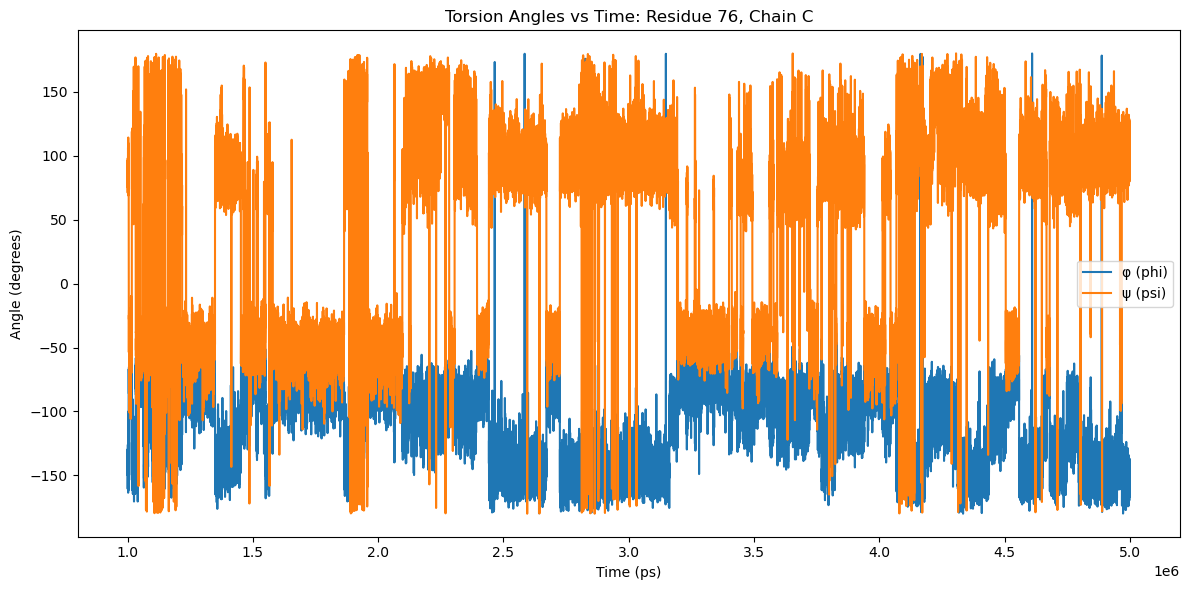

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_76_Chain_C.png


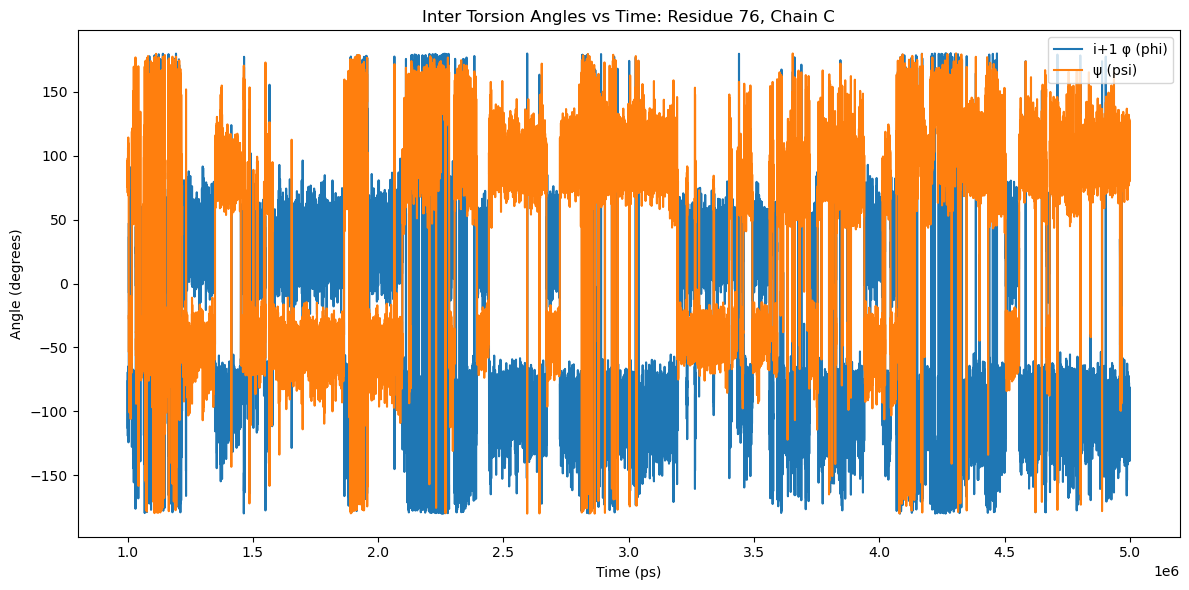

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_77_Chain_C.png


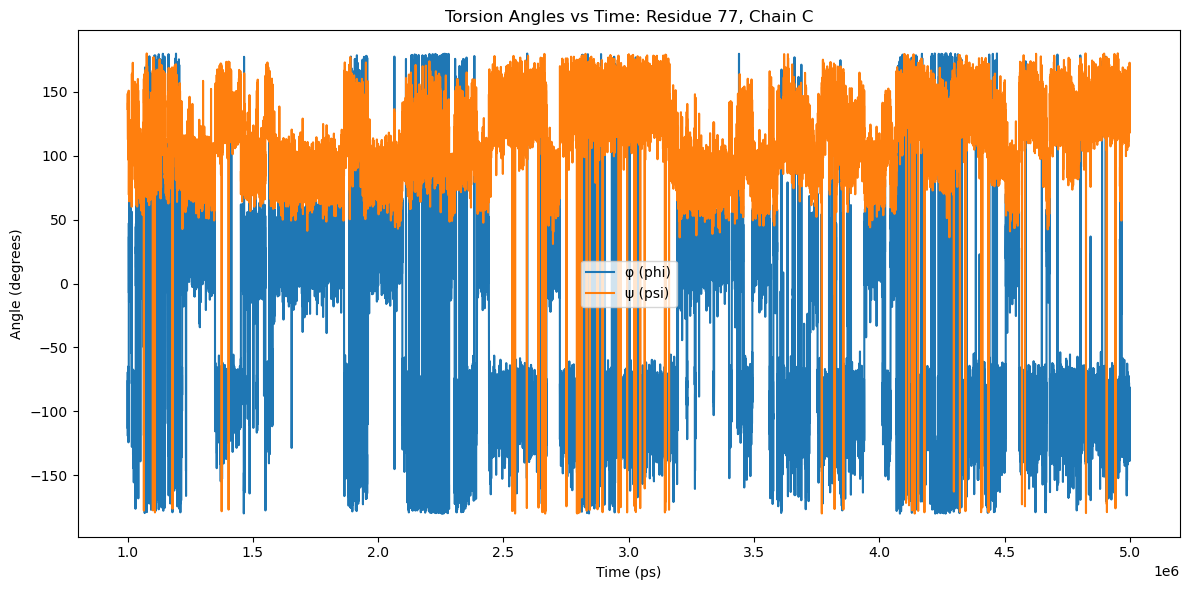

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_77_Chain_C.png


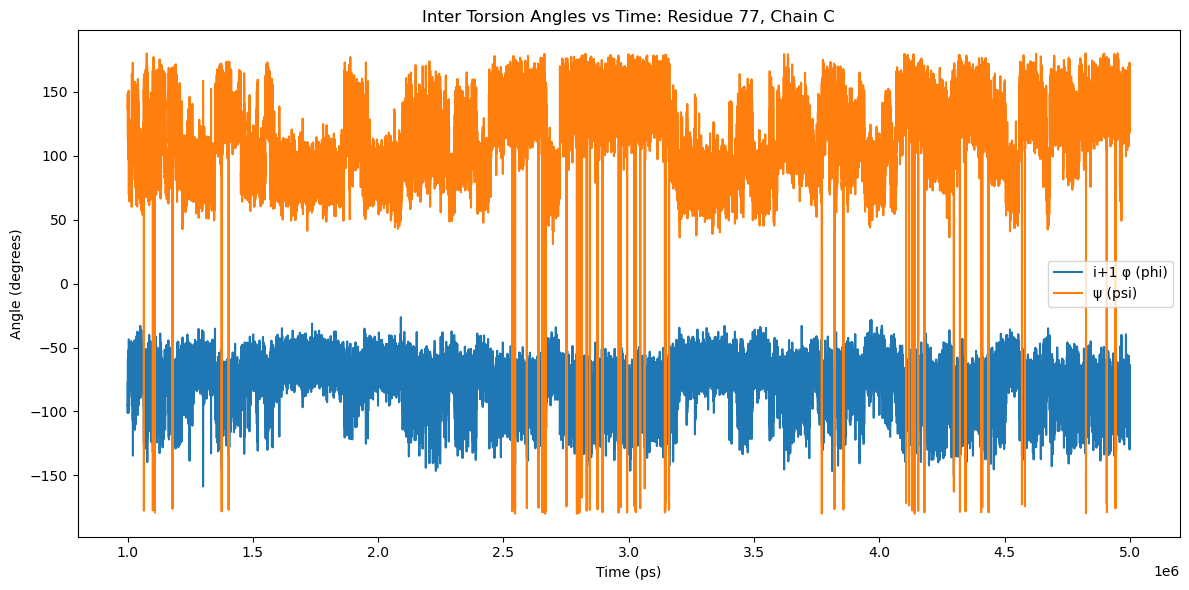

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_78_Chain_C.png


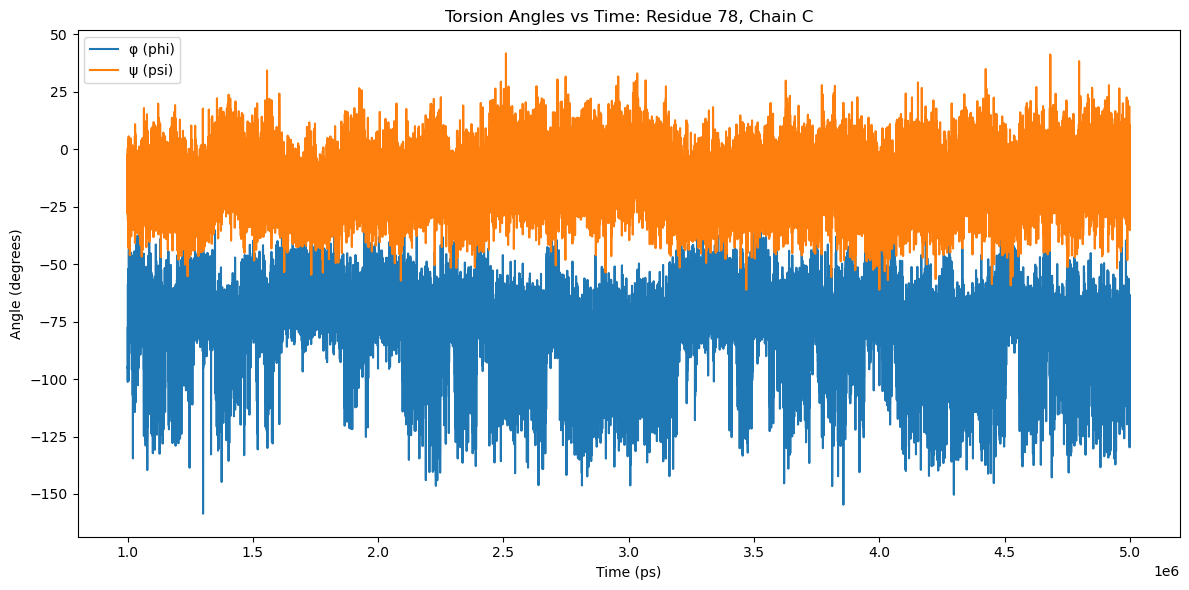

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_78_Chain_C.png


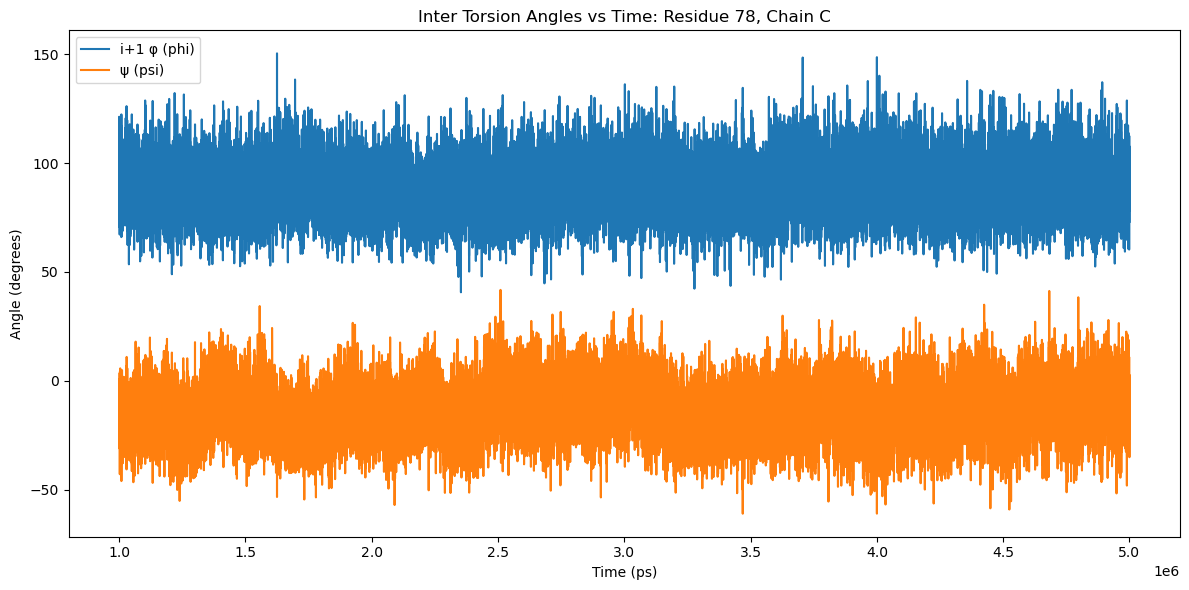

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_79_Chain_C.png


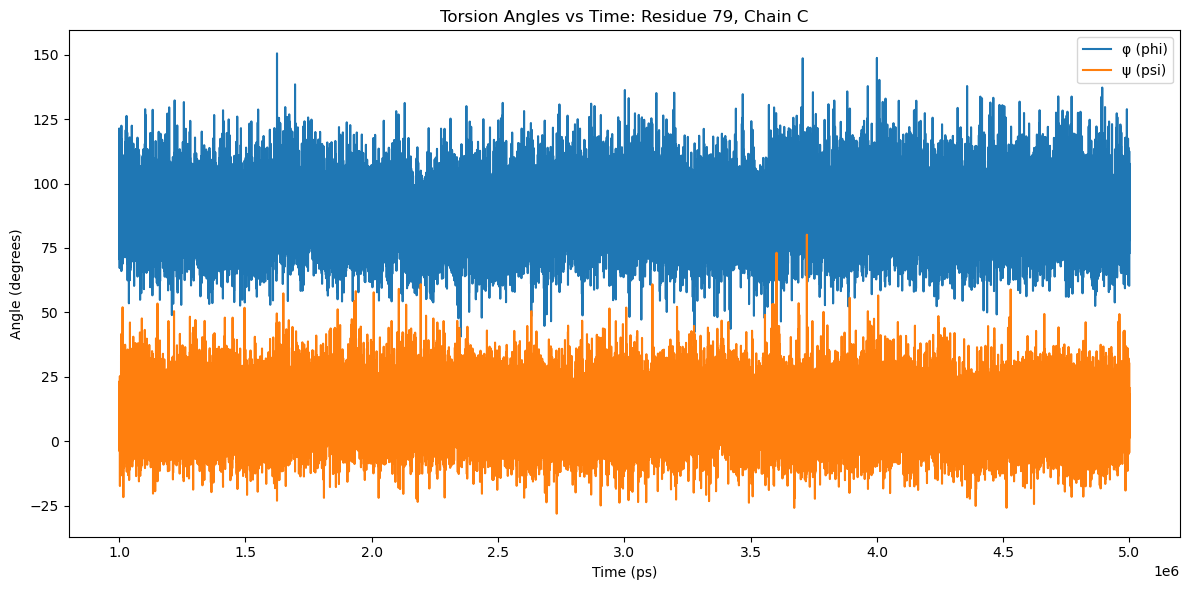

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_79_Chain_C.png


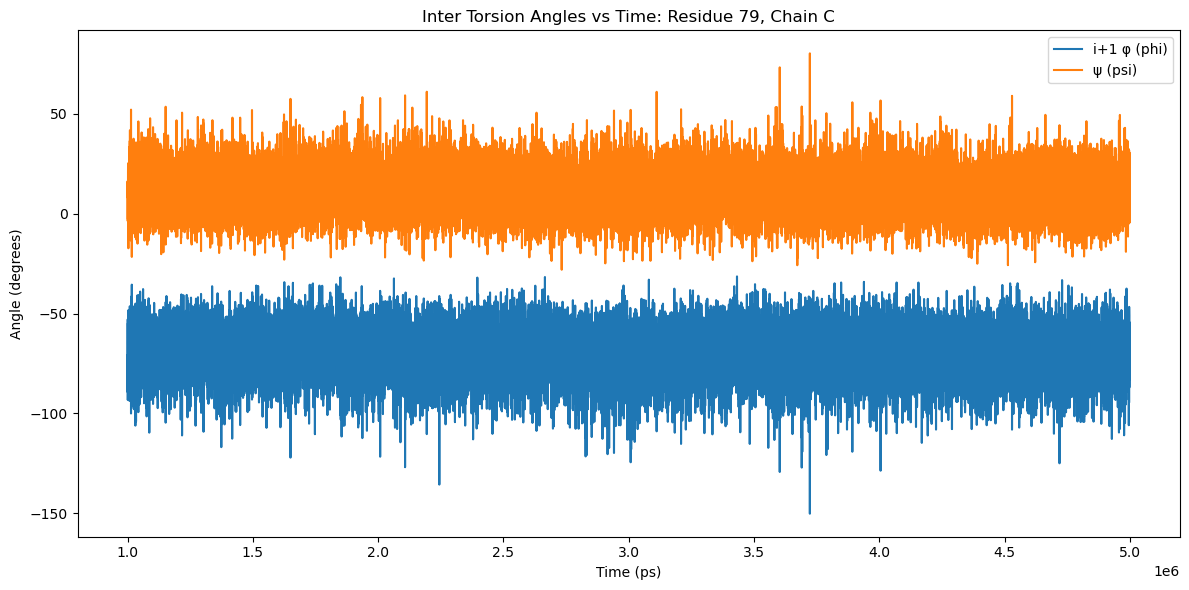

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_80_Chain_C.png


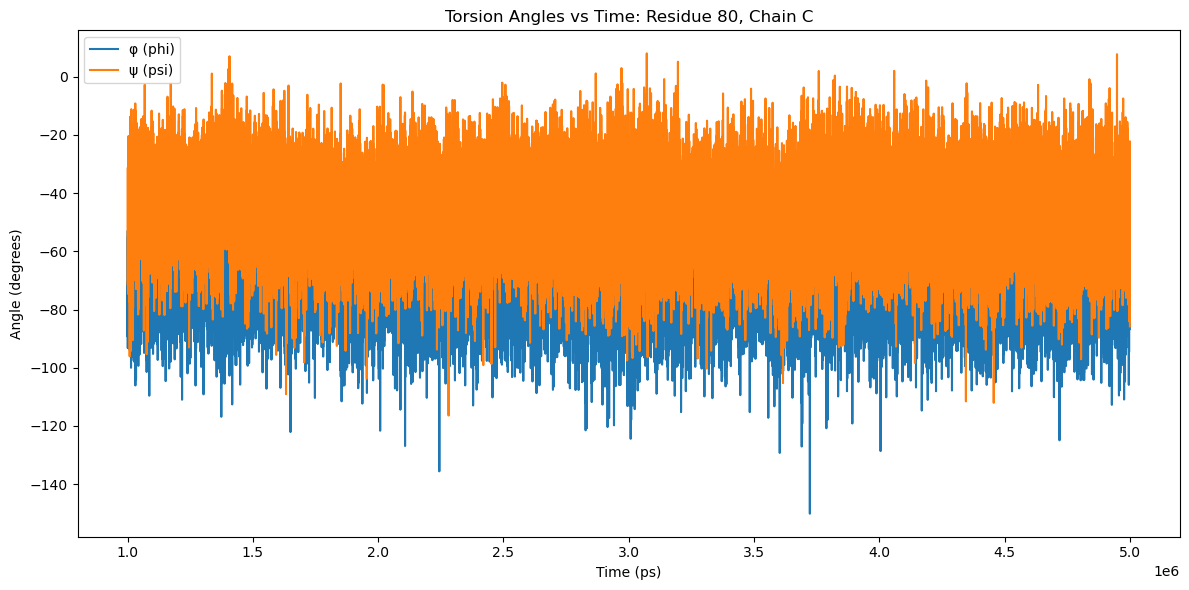

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_80_Chain_C.png


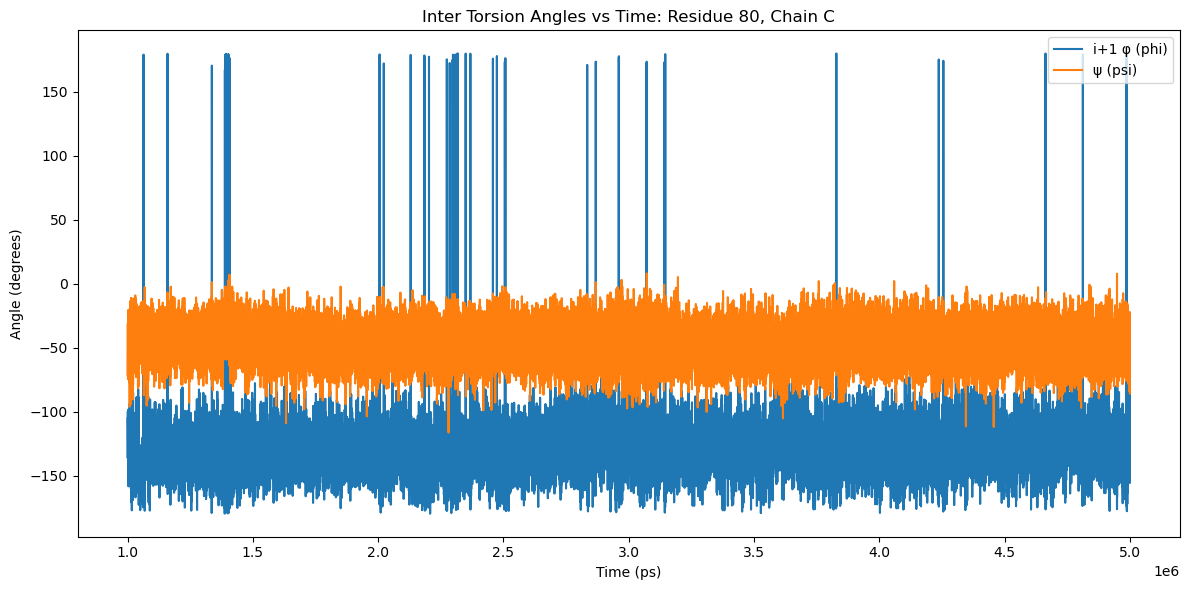

In [12]:
residues_to_plot=[52, 76,77, 78, 79, 80]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='C', analyzer=KcsA_analyzer[2], output_dir='KcsA_torsion_vs_time_ChainC')
    plot_inter_torsion_vs_time(residue=residue, chain='C', analyzer=KcsA_analyzer[2], output_dir='KcsA_inter_torsion_vs_time_ChainC')

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_52_Chain_D.png


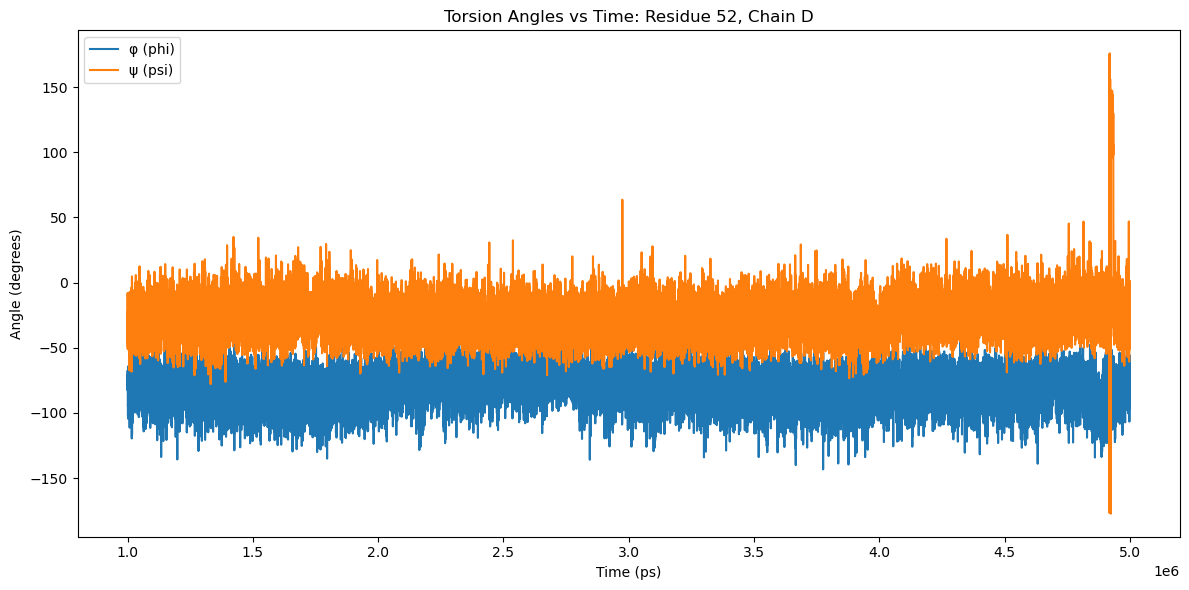

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_52_Chain_D.png


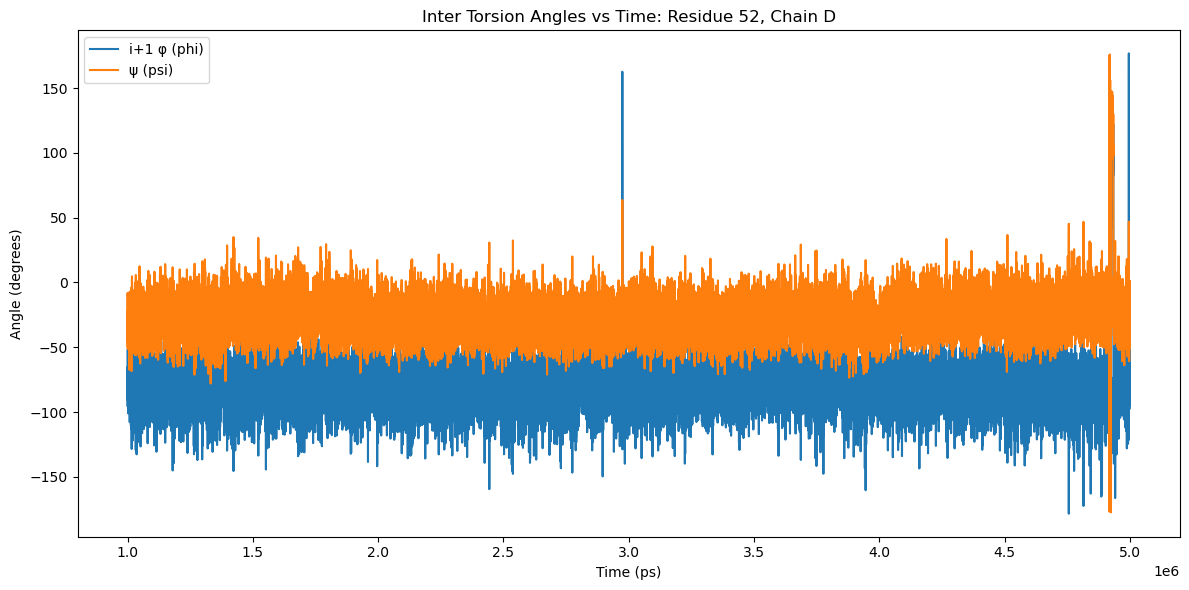

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_76_Chain_D.png


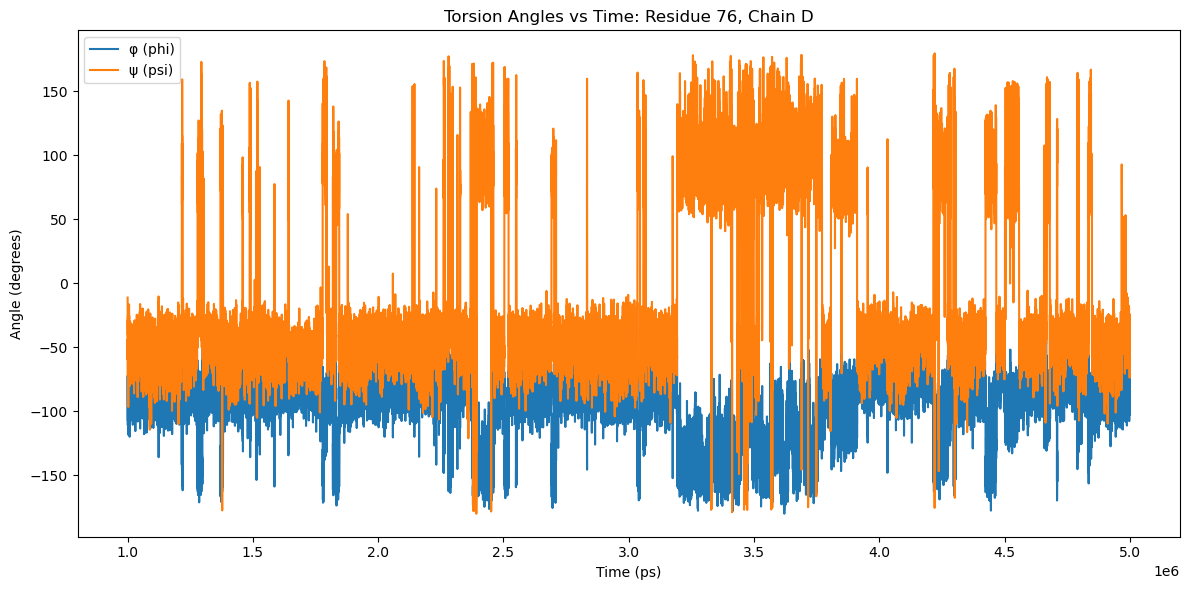

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_76_Chain_D.png


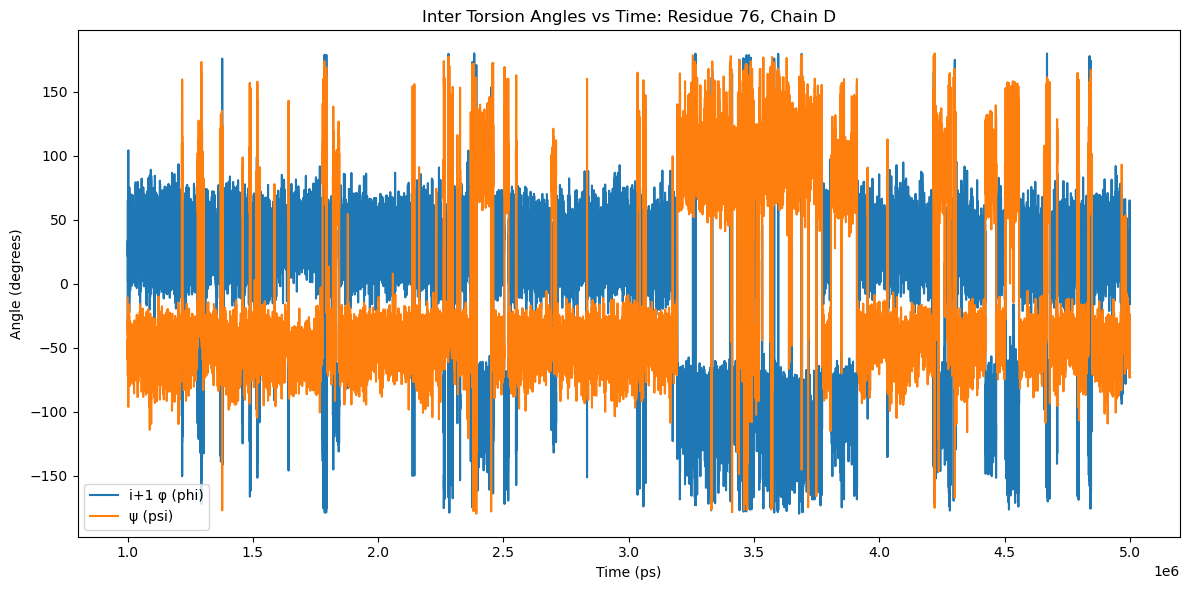

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_77_Chain_D.png


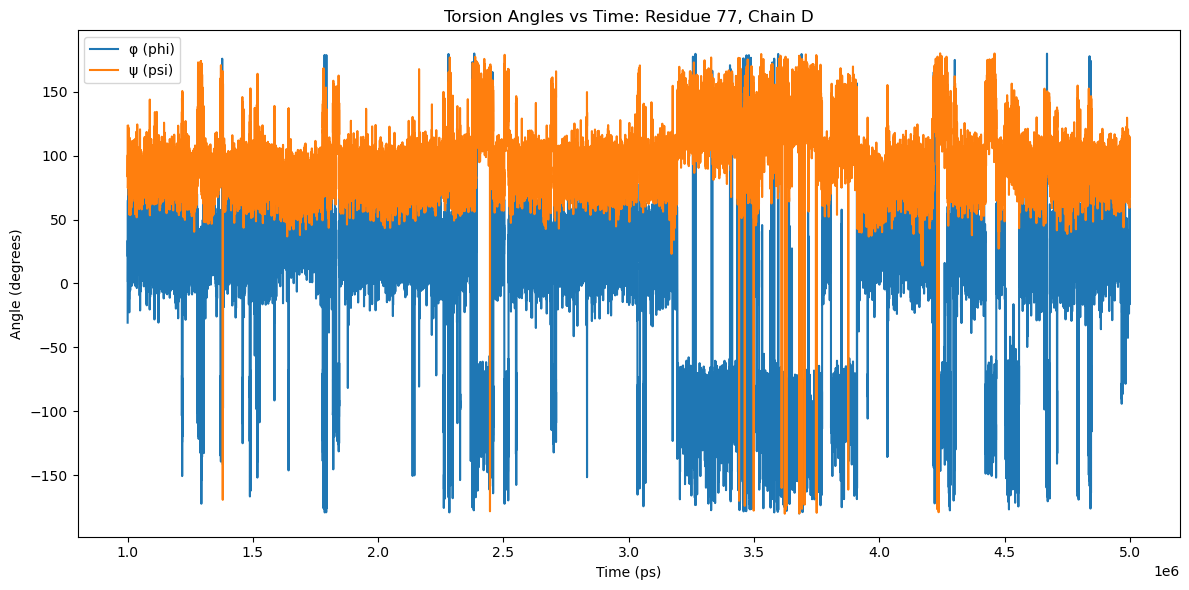

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_77_Chain_D.png


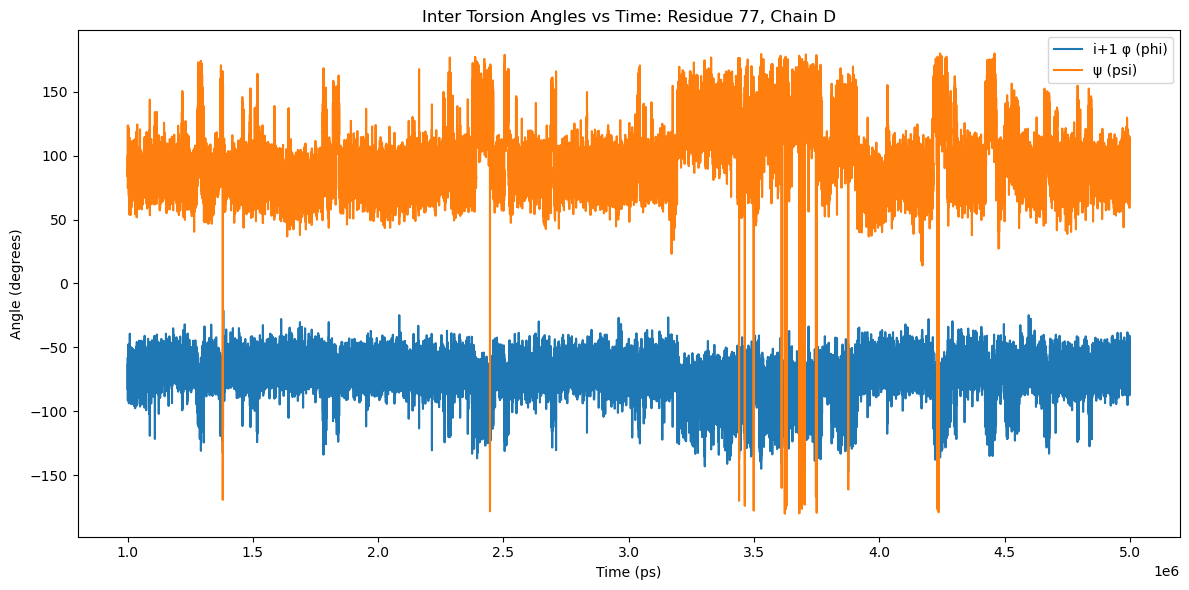

In [13]:
residues_to_plot=[52, 76, 77]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='D', analyzer=KcsA_analyzer[3], output_dir='KcsA_torsion_vs_time_ChainD')
    plot_inter_torsion_vs_time(residue=residue, chain='D', analyzer=KcsA_analyzer[3], output_dir='KcsA_inter_torsion_vs_time_ChainD')

## Correlation time analysis

Methods 1: use P2(COS thata)

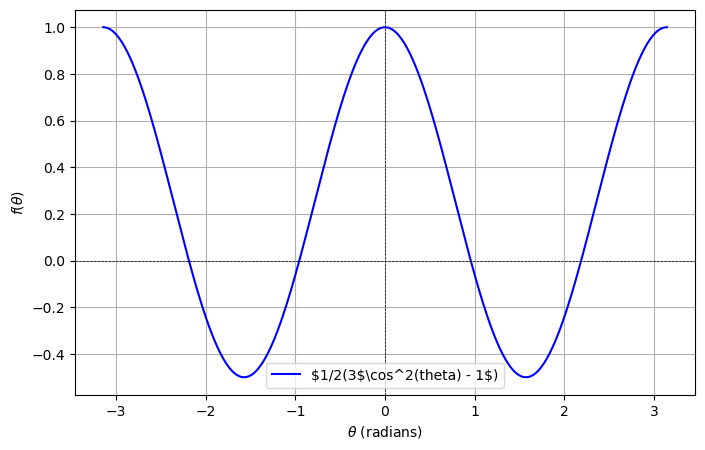

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of theta
theta = np.linspace(-np.pi, np.pi, 400)

# Compute the function values
f_theta = 1/2 * (3*np.cos(theta)**2 - 1)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(theta, f_theta, label=r'$1/2(3$\cos^2(theta) - 1$)', color='b')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$f(\theta)$')

plt.legend()
plt.grid(True)
plt.show()

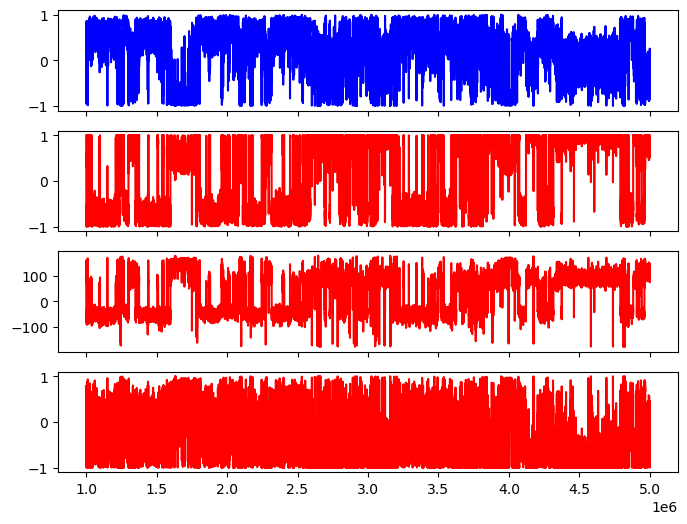

In [15]:
time = KcsA_analyzer[0].data['time_ps'].to_numpy()
chain = 'A'
residue = 76
psi = KcsA_analyzer[0].data[f'{chain}:{residue}-psi'].to_numpy()
psi_cos= np.cos(psi/180*np.pi)
psi_sin= np.sin(psi/180*np.pi)
p20= 1/2 * (3*np.cos(psi/180*np.pi)**2 - 1)
p10= 2*np.cos(psi/180*np.pi)**2 - 1
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex=True, figsize=(8, 6))
ax1.plot(time, psi_cos, label=f'{chain}:{residue}-psi_cos', color='blue')
ax2.plot(time, psi_sin, label=f'{chain}:{residue}-psi_sin', color='red')
ax3.plot(time, psi, label=f'{chain}:{residue}-psi', color='red')
ax4.plot(time, p10, label=f'{chain}:{residue}-p10', color='red')


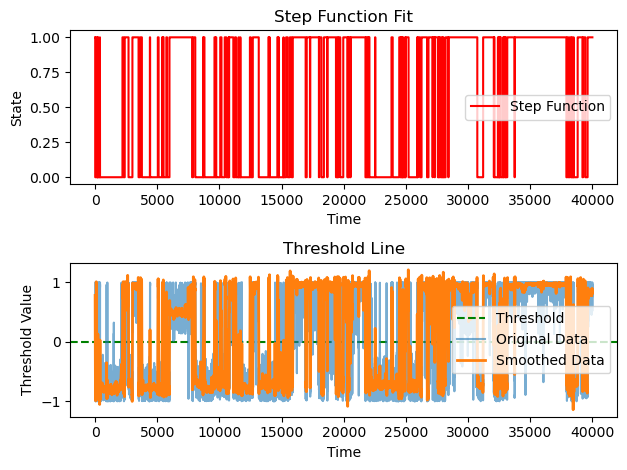

Dwell times for State 0: [61, 79, 9, 159, 1806, 98, 313, 119, 644, 620, 284, 17, 222, 194, 79, 644, 10, 806, 61, 321, 262, 181, 28, 140, 204, 118, 762, 159, 776, 15, 616, 26, 389, 199, 175, 90, 87, 26, 23, 199, 21, 102, 67, 241, 37, 73, 19, 52, 80, 30, 454, 1300, 527, 37, 74, 23, 170, 12, 687, 47, 121, 116, 7, 19, 78, 23, 102, 53, 167, 18, 469, 10, 276, 79, 21, 9, 195, 21, 55, 116, 22, 77, 122, 84, 105, 319, 60, 185]
Dwell times for State 1: [9, 56, 1, 12, 6, 85, 305, 494, 148, 19, 63, 47, 51, 59, 1819, 178, 1, 83, 60, 21, 100, 127, 18, 337, 78, 15, 18, 73, 479, 55, 35, 56, 26, 7, 130, 143, 1034, 260, 694, 179, 266, 685, 34, 142, 336, 35, 95, 1190, 54, 66, 39, 19, 98, 96, 28, 19, 28, 24, 239, 23, 166, 442, 335, 156, 236, 26, 99, 37, 37, 219, 2315, 862, 39, 20, 13, 25, 68, 25, 78, 29, 587, 4146, 78, 85, 14, 24, 383, 172, 385]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Example noisy two-state trajectory (replace with your actual data)
np.random.seed(42)
trajectory = psi_sin

# Smoothing the data
smoothed_trajectory = savgol_filter(trajectory, window_length=50, polyorder=2)

# Threshold to identify two states
threshold = 0
states = (smoothed_trajectory > threshold).astype(int)

# Create a step function
step_function = []
current_state = states[0]
for state in states:
    if state != current_state:
        step_function.append(current_state)
        current_state = state
step_function.append(current_state)

# Calculate dwell times
dwell_times = []
current_state = states[0]
count = 0

for state in states:
    if state == current_state:
        count += 1
    else:
        dwell_times.append((current_state, count))
        current_state = state
        count = 1
dwell_times.append((current_state, count))

# Separate dwell times by state
dwell_times_state_0 = [d[1] for d in dwell_times if d[0] == 0]
dwell_times_state_1 = [d[1] for d in dwell_times if d[0] == 1]

# Plot the original and smoothed data with the step function
# Subplot 1: Step function fit
plt.subplot(2, 1, 1)

plt.step(range(len(states)), states, label="Step Function", where='mid', color='red')
plt.xlabel("Time")
plt.ylabel("State")
plt.title("Step Function Fit")
plt.legend()

# Subplot 2: Threshold line
plt.subplot(2, 1, 2)
plt.axhline(threshold, color="green", linestyle="--", label="Threshold")
plt.plot(trajectory, label="Original Data", alpha=0.6)
plt.plot(smoothed_trajectory, label="Smoothed Data", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Threshold Value")
plt.title("Threshold Line")
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Print dwell times
print("Dwell times for State 0:", dwell_times_state_0)
print("Dwell times for State 1:", dwell_times_state_1)

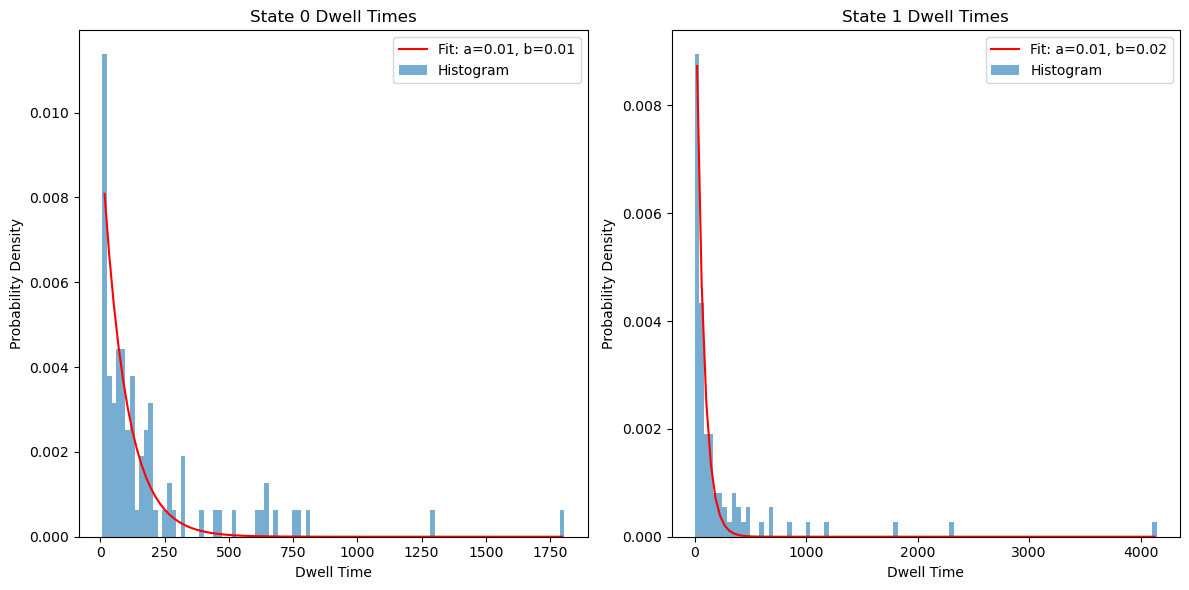

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
# Calculate dwell times
dwell_times = []
current_state = states[0]
count = 0

for state in states:
    if state == current_state:
        count += 1
    else:
        dwell_times.append((current_state, count))
        current_state = state
        count = 1
dwell_times.append((current_state, count))

# Separate dwell times by state
dwell_times_state_0 = [d[1] for d in dwell_times if d[0] == 0]
dwell_times_state_1 = [d[1] for d in dwell_times if d[0] == 1]

# Define exponential decay function
def exp_decay(x, a, b):
    return a * np.exp(-b * x)

# Histogram and fit for state 0
hist_0, bins_0 = np.histogram(dwell_times_state_0, bins=100, density=True)
bin_centers_0 = (bins_0[:-1] + bins_0[1:]) / 2
popt_0, _ = curve_fit(exp_decay, bin_centers_0, hist_0, p0=(1, 0.1))

# Histogram and fit for state 1
hist_1, bins_1 = np.histogram(dwell_times_state_1, bins=100, density=True)
bin_centers_1 = (bins_1[:-1] + bins_1[1:]) / 2
popt_1, _ = curve_fit(exp_decay, bin_centers_1, hist_1, p0=(1, 0.1))

# Plot histograms and fits
plt.figure(figsize=(12, 6))

# State 0
plt.subplot(1, 2, 1)
plt.bar(bin_centers_0, hist_0, width=(bins_0[1] - bins_0[0]), alpha=0.6, label="Histogram")
plt.plot(bin_centers_0, exp_decay(bin_centers_0, *popt_0), 'r-', label=f"Fit: a={popt_0[0]:.2f}, b={popt_0[1]:.2f}")
plt.title("State 0 Dwell Times")
plt.xlabel("Dwell Time")
plt.ylabel("Probability Density")
plt.legend()

# State 1
plt.subplot(1, 2, 2)
plt.bar(bin_centers_1, hist_1, width=(bins_1[1] - bins_1[0]), alpha=0.6, label="Histogram")
plt.plot(bin_centers_1, exp_decay(bin_centers_1, *popt_1), 'r-', label=f"Fit: a={popt_1[0]:.2f}, b={popt_1[1]:.2f}")
plt.title("State 1 Dwell Times")
plt.xlabel("Dwell Time")
plt.ylabel("Probability Density")
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
from hmmlearn import hmm
def fit_hmm(signal, n_states=2):
    """Fit a two-state HMM to the signal."""
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100)
    signal_reshaped = signal.reshape(-1, 1)
    model.fit(signal_reshaped)
    hidden_states = model.predict(signal_reshaped)
    return model, hidden_states

def plot_hmm(signal, hidden_states):
    """Plot signal with HMM-inferred state classifications."""
    plt.figure(figsize=(8, 4))
    plt.plot(signal, label="Signal", alpha=0.7)
    plt.scatter(np.arange(len(signal)), hidden_states, color='red', marker='o', s=10, label="HMM States")
    plt.xlabel("Time")
    plt.ylabel("Signal Intensity")
    plt.title("HMM-Inferred State Classification")
    plt.legend()
    plt.show()

In [19]:
def estimate_transition_matrix(trajectory):
    """
    Estimate the transition matrix for a two-state Markov process.

    Parameters:
    trajectory (list or array): Sequence of observed states (0 or 1).

    Returns:
    np.array: 2x2 transition matrix.
    """
    n00 = n01 = n10 = n11 = 0

    for (current_state, next_state) in zip(trajectory[:-1], trajectory[1:]):
        if current_state == 0:
            if next_state == 0:
                n00 += 1
            else:
                n01 += 1
        else:
            if next_state == 0:
                n10 += 1
            else:
                n11 += 1

    # Calculate transition probabilities
    p00 = n00 / (n00 + n01) if (n00 + n01) > 0 else 0
    p11 = n11 / (n10 + n11) if (n10 + n11) > 0 else 0

    return np.array([[p00, 1 - p00],
                     [1 - p11, p11]])

def autocorrelation_time(transition_matrix):
    """
    Calculate the autocorrelation time from the transition matrix.

    Parameters:
    transition_matrix (np.array): 2x2 transition matrix.

    Returns:
    float: Autocorrelation time.
    """
    p00 = transition_matrix[0, 0]
    p11 = transition_matrix[1, 1]

    # Average transition probability
    p_avg = (p00 + p11) / 2

    # Autocorrelation time
    if p_avg == 1:
        return np.inf  # Infinite autocorrelation time for a deterministic process
    else:
        return 1 / (1 - p_avg)

# Example usage:
#trajectory = [0, 1, 0, 0, 1, 1, 0, 1, 0, 0]  # Example two-state trajectory
transition_matrix = estimate_transition_matrix(states)
tau = autocorrelation_time(transition_matrix)

print("Estimated Transition Matrix:")
print(transition_matrix)
print(f"Autocorrelation Time: {tau}")

Estimated Transition Matrix:
[[0.99511193 0.00488807]
 [0.00400055 0.99599945]]
Autocorrelation Time: 225.00681306817748


In [ ]:
def calculate_cross_correlation(y1, y2, lags):
    """
    Calculate the cross-correlation of two time series for specified lags.
    
    Parameters:
    y1 (np.ndarray): The first time series.
    y2 (np.ndarray): The second time series.
    lags (np.ndarray): Array of lags for which to calculate cross-correlation.
    
    Returns:
    cross_corr (np.ndarray): Cross-correlation values for each lag.
    """
    n = len(y1)
    cross_corr = np.zeros_like(lags, dtype=float)

    # Mean of both time series
    y1_mean = np.mean(y1)
    y2_mean = np.mean(y2)

    # Calculate cross-correlation for specified lags
    for idx, lag in enumerate(lags):
        if lag < 0:
            cross_corr[idx] = np.sum((y1[-lag:] - y1_mean) * (y2[:lag] - y2_mean))
        else:
            cross_corr[idx] = np.sum((y1[:-lag] - y1_mean) * (y2[lag:] - y2_mean))

    # Normalize the result
    cross_corr /= n
    return cross_corr

def calculate_residue_values_and_correlations(file_name):
    try:
        # Load the CSV file into a pandas DataFrame
        data = pd.read_csv(file_name)
    except FileNotFoundError:
        print(f"Error: The file {file_name} was not found.")
        return
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    # Check if the time_ps column exists
    if 'time_ps' not in data.columns:
        print("Error: 'time_ps' column not found in the CSV file.")
        return

    # Initialize a dictionary to store calculated values
    residue_values = {}
    
    # Get all the unique residues from the column names
    residues = sorted(set(col.split('-')[0] for col in data.columns if '-psi' in col or '-phi' in col))

    # Calculate the value for each residue
    for residue in residues:
        psi_col = f"{residue}-psi"
        phi_col = f"{residue}-phi"
        
        try:
            if psi_col in data.columns and phi_col in data.columns:
                # Calculate the value (phi + 0.5 * psi)
                residue_values[residue] = data[phi_col] + 0.5 * data[psi_col]
            else:
                print(f"Warning: Missing psi or phi column for residue {residue}.")
        except Exception as e:
            print(f"Error calculating value for residue {residue}: {e}")

    # Convert the dictionary to a DataFrame for easier manipulation
    values_df = pd.DataFrame(residue_values)

    adjusted_residues = [adjust_residue_number(res) for res in residues]
    values_df.columns = adjusted_residues


    # Define logarithmic lags from 1 ns to 10 ns (in number of time steps)
    time_points = values_df.shape[0]
    max_lag_ns = 50  # Maximum lag in ns
    lags = np.logspace(0, np.log10(max_lag_ns), num=max_lag_ns, dtype=int)

    # Initialize a dictionary to store cross-correlations
    cross_correlation_results = {}

    # Perform cross-correlation analysis between residues
    for i in range(len(adjusted_residues)):
        for j in range(i + 1, len(adjusted_residues)):  # Only calculate for i < j
            res_i = adjusted_residues[i]
            res_j = adjusted_residues[j]
            
            try:
                # Call the cross-correlation calculation function
                cross_corr = calculate_cross_correlation(
                    values_df[res_i].values, values_df[res_j].values, lags)
                cross_correlation_results[(res_i, res_j)] = (lags, cross_corr)
            except Exception as e:
                print(f"Error calculating cross-correlation for residues {res_i} and {res_j}: {e}")


    # Plot cross-correlations only involving residue 76
    for (res_i, res_j), (lags, cross_corr) in cross_correlation_results.items():
        if res_j == 76 :
            plt.figure(figsize=(10, 6))
            plt.plot(lags, cross_corr, marker='o')
            plt.title(f"Cross-Correlation between {res_i} and {res_j}")
            plt.xlabel("Lag (ns)")
            plt.ylabel("Cross-Correlation")
            plt.grid()
            plt.axhline(0, color='black', lw=0.5, ls='--')
            
            # Save the plot in the same directory as the input file
            plot_output_file = os.path.join(os.path.dirname(file_name),
                                             f"{res_i}_{res_j}_cross_correlation.png")
            plt.savefig(plot_output_file)
            plt.close()
            print(f"Cross-correlation plot saved as {plot_output_file}")